In [1]:
# Import pakietów
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
# import sklearn
# import sklearn.preprocessing

# Wczytywanie danych 

In [2]:
vehicles = pd.read_csv('vehicles.csv')
vehicles

Unnamed: 0          id  \
0                0  7240372487   
1                1  7240309422   
2                2  7240224296   
3                3  7240103965   
4                4  7239983776   
...            ...         ...   
458208      458208  7240959076   
458209      458209  7240954682   
458210      458210  7240645700   
458211      458211  7240600465   
458212      458212  7240562359   

                                                      url   region  \
0       https://auburn.craigslist.org/ctd/d/auburn-uni...   auburn   
1       https://auburn.craigslist.org/cto/d/auburn-201...   auburn   
2       https://auburn.craigslist.org/cto/d/auburn-200...   auburn   
3       https://auburn.craigslist.org/cto/d/lanett-tru...   auburn   
4       https://auburn.craigslist.org/cto/d/auburn-200...   auburn   
...                                                   ...      ...   
458208  https://wausau.craigslist.org/ctd/d/wisconsin-...   wausau   
458209  https://wausau.craigslist.org/ctd/d/wisconsin-...   wausau   
458210  https://wyoming.craigslist.org/cto/d/sheridan-...  wyoming   
458211  https://wyoming.craigslist.org/cto/d/sheridan-...  wyoming   
458212  https://wyoming.craigslist.org/ctd/d/gilberts-...  wyoming   

                            region_url  price    year manufacturer  \
0        https://auburn.craigslist.org  35990  2010.0    chevrolet   
1        https://auburn.craigslist.org   7500  2014.0      hyundai   
2        https://auburn.craigslist.org   4900  2006.0          bmw   
3        https://auburn.craigslist.org   2000  1974.0    chevrolet   
4        https://auburn.craigslist.org  19500  2005.0         ford   
...                                ...    ...     ...          ...   
458208   https://wausau.craigslist.org  14995  2014.0     cadillac   
458209   https://wausau.craigslist.org  17895  2018.0      hyundai   
458210  https://wyoming.craigslist.org  17900  2014.0     cadillac   
458211  https://wyoming.craigslist.org   1300  2008.0         jeep   
458212  https://wyoming.craigslist.org  22900  2008.0          NaN   

                       model  condition  ... drive       size    type  \
0       corvette grand sport       good  ...   rwd        NaN   other   
1                     sonata  excellent  ...   fwd        NaN   sedan   
2                    x3 3.0i       good  ...   NaN        NaN     SUV   
3                       c-10       good  ...   rwd  full-size  pickup   
4                f350 lariat  excellent  ...   4wd  full-size  pickup   
...                      ...        ...  ...   ...        ...     ...   
458208                   srx  excellent  ...   4wd   mid-size     SUV   
458209                tucson  excellent  ...   4wd   mid-size     SUV   
458210         cts coupe awd  excellent  ...   4wd   mid-size   coupe   
458211        grand cherokee       good  ...   4wd   mid-size     SUV   
458212    International 4300        NaN  ...   NaN        NaN     NaN   

       paint_color                                          image_url  \
0              NaN  https://images.craigslist.org/00N0N_ipkbHVZYf4...   
1              NaN  https://images.craigslist.org/00s0s_gBHYmJ5o7y...   
2             blue  https://images.craigslist.org/00B0B_5zgEGWPOrt...   
3             blue  https://images.craigslist.org/00M0M_6o7KcDpArw...   
4             blue  https://images.craigslist.org/00p0p_b95l1EgUfl...   
...            ...                                                ...   
458208      silver  https://images.craigslist.org/00808_1bVcaYZtCy...   
458209       white  https://images.craigslist.org/00l0l_gikkP11dEF...   
458210       black  https://images.craigslist.org/00t0t_lNnW4cboOG...   
458211       white  https://images.craigslist.org/00C0C_fl0NW1IeJw...   
458212         NaN  https://images.craigslist.org/00k0k_77qSSp6sQC...   

                                              description state        lat  \
0       Carvana is the safer way to buy a car During t...    al  32.590000   
1      

# Sprawdzenie i czyszczenie danych

In [3]:
vehicles.info() # Wyświetlamy wszystkie zmienne 
# lat = latitude (szerokość geograficzna), long = longitude (długość geograficzna)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    458213 non-null  int64  
 1   id            458213 non-null  int64  
 2   url           458213 non-null  object 
 3   region        458213 non-null  object 
 4   region_url    458213 non-null  object 
 5   price         458213 non-null  int64  
 6   year          457163 non-null  float64
 7   manufacturer  439993 non-null  object 
 8   model         453367 non-null  object 
 9   condition     265273 non-null  object 
 10  cylinders     287073 non-null  object 
 11  fuel          454976 non-null  object 
 12  odometer      402910 non-null  float64
 13  title_status  455636 non-null  object 
 14  transmission  455771 non-null  object 
 15  VIN           270664 non-null  object 
 16  drive         324025 non-null  object 
 17  size          136865 non-null  object 
 18  type

### Ile rekordow ma wartosci nan?

In [4]:
nullsum = 0
nulldf = vehicles.isnull()
for i in range(458213):
    for j in range(26):
        if nulldf.iloc[i,j] == True:
            nullsum = nullsum + 1
            break
print(nullsum)

415829


### Zmienne numeryczne 

In [5]:
# Wyświetlenie podstawowych statystyk dla zmiennych numerycznych
vehicles.describe()

Unnamed: 0            id         price           year      odometer  \
count  458213.000000  4.582130e+05  4.582130e+05  457163.000000  4.029100e+05   
mean   229106.000000  7.235233e+09  4.042093e+04    2010.746067  1.016698e+05   
std    132274.843786  4.594362e+06  8.194599e+06       8.868136  3.228623e+06   
min         0.000000  7.208550e+09  0.000000e+00    1900.000000  0.000000e+00   
25%    114553.000000  7.231953e+09  4.900000e+03    2008.000000  4.087700e+04   
50%    229106.000000  7.236409e+09  1.099500e+04    2013.000000  8.764100e+04   
75%    343659.000000  7.239321e+09  2.149500e+04    2016.000000  1.340000e+05   
max    458212.000000  7.241019e+09  3.615215e+09    2021.000000  2.043756e+09   

                 lat           long  
count  450765.000000  450765.000000  
mean       38.531925     -94.375824  
std         5.857378      18.076225  
min       -82.607549    -164.091797  
25%        34.600000    -110.890427  
50%        39.244500     -88.314889  
75%        42.484503     -81.015022  
max        82.049255     150.898969

In [6]:
# Zmienna price: sprawdzamy wartosci ponad milion, a następnie te, które wydają się błędnie wprowadzone zastępujemy NaN
vehicles[vehicles['price'] > 1000000].price

1622      1234567890
21955        1234567
25413       11111111
38375     2808348671
107009       9999999
109428       3429900
109654      11111111
117008       1234567
145053      12345679
151283       1234567
151323       1234567
167398       1234567
174403      22000000
185946       1111111
190027       1234567
191736      79000000
191738       7900000
215250       1111111
219541       1111111
238861      98504250
256573      12345678
267603       1234567
305894       1111111
306217     123456789
326182     123456789
339197     123456789
339213     123456789
346637       1111111
360640      11111111
362163      50000000
364274       1111111
369909       1234567
370801       2015200
372613       1234567
374346       1234567
384531       1234567
385434    3615215112
386045       1111111
389721       1234567
392756       1234567
393667     100000000
414603     123456789
414605     123456789
425188    2857993261
Name: price, dtype: int64

In [7]:
# Usuwamy wszystkie 11111... oraz 12345...
# Ogólnie te wartości co maja te same cyfry, czy też cyfry po kolei, muszą być błędnie wpisane
# Przykład
replace = vehicles['price'] == 1234567890
vehicles.loc[replace, 'price'] = np.nan

In [8]:
vehicles.iloc[1622,:] # Widzimy, że obs. 1622 ma wartość NaN

Unnamed: 0                                                   1622
id                                                     7229441403
url             https://bham.craigslist.org/cto/d/trussville-1...
region                                                 birmingham
region_url                            https://bham.craigslist.org
price                                                         NaN
year                                                       1955.0
manufacturer                                            chevrolet
model                                                         NaN
condition                                                     NaN
cylinders                                                     NaN
fuel                                                          gas
odometer                                                      NaN
title_status                                                clean
transmission                                            automatic
VIN       

In [9]:
n = 1234
m = 1111
for i in range(5,10):
    n = n*10 + i
    m = m*10 + 1
    replace1 = vehicles['price'] == n
    replace2 = vehicles['price'] == m
    vehicles.loc[replace1, 'price'] = np.nan
    vehicles.loc[replace2, 'price'] = np.nan

vehicles[vehicles['price'] > 1000000].price

38375     2.808349e+09
107009    9.999999e+06
109428    3.429900e+06
145053    1.234568e+07
174403    2.200000e+07
191736    7.900000e+07
191738    7.900000e+06
238861    9.850425e+07
362163    5.000000e+07
370801    2.015200e+06
385434    3.615215e+09
393667    1.000000e+08
425188    2.857993e+09
Name: price, dtype: float64

In [10]:
# Pozostałe wartości 'price' >= 1000000 trzeba także sprawdzić
vehicles[vehicles['price'] >= 1000000]

Unnamed: 0          id  \
38375        38375  7233307527   
107009      107009  7240359259   
109428      109428  7236905649   
145053      145053  7230202474   
174403      174403  7232219548   
191736      191736  7235342524   
191738      191738  7235338576   
238861      238861  7239202090   
358275      358275  7230619263   
362163      362163  7235334409   
370801      370801  7240732518   
385434      385434  7237527212   
393667      393667  7229165030   
399972      399972  7232485685   
425188      425188  7236646658   

                                                      url          region  \
38375   https://modesto.craigslist.org/ctd/d/modesto-w...         modesto   
107009  https://miami.craigslist.org/brw/cto/d/hollywo...   south florida   
109428  https://spacecoast.craigslist.org/ctd/d/royal-...     space coast   
145053  https://evansville.craigslist.org/ctd/d/evansv...      evansville   
174403  https://neworleans.craigslist.org/cto/d/coving...     new orleans   
191736  https://annarbor.craigslist.org/ctd/d/great-fa...       ann arbor   
191738  https://annarbor.craigslist.org/ctd/d/great-fa...       ann arbor   
238861  https://fayetteville.craigslist.org/cto/d/faye...    fayetteville   
358275  https://sd.craigslist.org/cto/d/fort-meade-sha...    south dakota   
362163  https://knoxville.craigslist.org/ctd/d/great-f...       knoxville   
370801  https://austin.craigslist.org/ctd/d/austin-201...          austin   
385434  https://lubbock.craigslist.org/cto/d/levelland...         lubbock   
393667  https://wichitafalls.craigslist.org/cto/d/wich...   wichita falls   
399972  https://fredericksburg.craigslist.org/cto/d/fr...  fredericksburg   
425188  https://eauclaire.craigslist.org/cto/d/altoona...      eau claire   

                                   region_url         price    year  \
38375          https://modesto.craigslist.org  2.808349e+09  2020.0   
107009           https://miami.craigslist.org  9.999999e+06  2019.0   
109428      https://spacecoast.craigslist.org  3.429900e+06  2017.0   
145053      https://evansville.craigslist.org  1.234568e+07  2006.0   
174403      https://neworleans.craigslist.org  2.200000e+07  2015.0   
191736        https://annarbor.craigslist.org  7.900000e+07  1955.0   
191738        https://annarbor.craigslist.org  7.900000e+06  1955.0   
238861    https://fayetteville.craigslist.org  9.850425e+07  2008.0   
358275              https://sd.craigslist.org  1.000000e+06  1987.0   
362163       https://knoxville.craigslist.org  5.000000e+07  1955.0   
370801          https://austin.craigslist.org  2.015200e+06  2015.0   
385434         https://lubbock.craigslist.org  3.615215e+09  2006.0   
393667    https://wichitafalls.craigslist.org  1.000000e+08  1961.0   
399972  https://fredericksburg.craigslist.org  1.000000e+06  1966.0   
425188       https://eauclaire.craigslist.org  2.857993e+09  2003.0   

         manufacturer               model  condition  ... drive       size  \
38375             gmc                 NaN        NaN  ...   NaN        NaN   
107009  mercedes-benz           benz e350        NaN  ...   NaN        NaN   
109428           jeep  wrangler unlimited        NaN  ...   4wd        NaN   
145053           jeep            wrangler   like new  ...   4wd        NaN   
174403         toyota              tacoma       good  ...   fwd   mid-size   
191736       cadillac           fleetwood  excellent  ...   rwd  full-size   
191738       cadillac           fleetwood  excellent  ...   rwd  full-size   
238861           ford              ranger   like new  ...   4wd  full-size   
358275      chevrolet                 NaN       good  ...   NaN        NaN   
362163       cadillac                 NaN  excellent  ...   rwd  full-size   
370801       chrysler                 200        NaN  ...   NaN        NaN   
385434      chevrolet    silverado 2500hd       good  ...   4wd  full-size   
393667            NaN       1961 corvette  excellent  ...   rwd  full-size   
3

In [11]:
# Żadne z tych aut nie jest tyle warte, a więc usuwamy te wszystkie ceny
replace = vehicles['price'] >= 1000000
vehicles.loc[replace, 'price'] = np.nan

In [12]:
# Sprawdzenie droższych samochodów, tj. z price > 500000
vehicles[vehicles['price'] > 500000]

Unnamed: 0          id  \
39335        39335  7236015170   
55387        55387  7239013826   
91692        91692  7230514561   
190054      190054  7235748296   
277726      277726  7237729041   
291657      291657  7239877402   
304139      304139  7232956812   
312675      312675  7237640431   
312849      312849  7228560275   
407436      407436  7226466619   

                                                      url  \
39335   https://monterey.craigslist.org/cto/d/monterey...   
55387   https://sandiego.craigslist.org/csd/cto/d/san-...   
91692   https://fortmyers.craigslist.org/col/ctd/d/nap...   
190054  https://worcester.craigslist.org/ctd/d/worcest...   
277726  https://longisland.craigslist.org/cto/d/glen-c...   
291657  https://akroncanton.craigslist.org/ctd/d/fayet...   
304139  https://dayton.craigslist.org/cto/d/dayton-wtb...   
312675  https://texoma.craigslist.org/cto/d/van-alstyn...   
312849  https://texoma.craigslist.org/cto/d/van-alstyn...   
407436  https://richmond.craigslist.org/ctd/d/richmond...   

                        region                          region_url     price  \
39335             monterey bay     https://monterey.craigslist.org  599000.0   
55387                san diego     https://sandiego.craigslist.org  888777.0   
91692    ft myers / SW florida    https://fortmyers.craigslist.org  999000.0   
190054  worcester / central MA    https://worcester.craigslist.org  625000.0   
277726             long island   https://longisland.craigslist.org  999999.0   
291657          akron / canton  https://akroncanton.craigslist.org  785554.0   
304139    dayton / springfield       https://dayton.craigslist.org  999999.0   
312675                  texoma       https://texoma.craigslist.org  777777.0   
312849                  texoma       https://texoma.craigslist.org  777777.0   
407436                richmond     https://richmond.craigslist.org  875995.0   

          year   manufacturer             model condition  ... drive  \
39335   2020.0         toyota               NaN       NaN  ...   NaN   
55387   2005.0         toyota      land cruiser       NaN  ...   NaN   
91692   2017.0  mercedes-benz          amg g 63       NaN  ...   4wd   
190054  2020.0        ferrari  488 pista spider       NaN  ...   NaN   
277726  1974.0            NaN         Excalibur      good  ...   rwd   
291657     NaN            NaN              ssss       NaN  ...   4wd   
304139  2011.0         toyota             camry       NaN  ...   fwd   
312675  2012.0            gmc            sierra       NaN  ...   NaN   
312849  2012.0            gmc            sierra       NaN  ...   NaN   
407436  2011.0      chevrolet             tahoe       NaN  ...   rwd   

             size   type paint_color  \
39335         NaN    NaN         NaN   
55387         NaN    NaN         NaN   
91692         NaN    SUV       white   
190054        NaN    NaN      silver   
277726  full-size  sedan       brown   
291657        NaN  wagon         NaN   
304139   mid-size  sedan         NaN   
312675        NaN    NaN         NaN   
312849        NaN    NaN         NaN   
407436        NaN    SUV      silver   

                                                image_url  \
39335   https://images.craigslist.org/00V0V_iWX7YsUGaU...   
55387   https://images.craigslist.org/00K0K_ixpVoNbcRg...   
91692   https://images.craigslist.org/01111_4xcfVqDGil...   
190054  https://images.craigslist.org/01111_ffBkLiuWV9...   
277726  https://images.craigslist.org/00202_cSCOvlNWvA...   
291657  https://images.craigslist.org/00101_4Cyr226t0I...   
304139  https://images.craigslist.org/00v0v_lv5k0teFBQ...   
312675  https://images.craigslist.org/00R0R_kHNzv1mFXY...   
312849  https://images.craigslist.org/00R0R_kHNzv1mFXY...   
407436  https://images.craigslist.org/00j0j_lI0EMXJ9QM...   

                                              description state        lat  \
39335   PLEASE WATCH BELOW  https://youtu.be/eloezvX7-...    ca  36.578849   
55387   Official T

In [13]:
# Usuwamy wszystkie marki dla których price > 500000, z wyjątkiem Ferrari

replace = vehicles['price'] > 700000
vehicles.loc[replace,'price'] = np.nan
vehicles[vehicles['price'] > 500000]

replace = vehicles['price'] == 599000
vehicles.loc[replace,'price'] = np.nan

vehicles.describe()

Unnamed: 0            id          price           year  \
count  458213.000000  4.582130e+05  458049.000000  457163.000000   
mean   229106.000000  7.235233e+09   14832.912090    2010.746067   
std    132274.843786  4.594362e+06   14144.310911       8.868136   
min         0.000000  7.208550e+09       0.000000    1900.000000   
25%    114553.000000  7.231953e+09    4900.000000    2008.000000   
50%    229106.000000  7.236409e+09   10995.000000    2013.000000   
75%    343659.000000  7.239321e+09   21491.000000    2016.000000   
max    458212.000000  7.241019e+09  625000.000000    2021.000000   

           odometer            lat           long  
count  4.029100e+05  450765.000000  450765.000000  
mean   1.016698e+05      38.531925     -94.375824  
std    3.228623e+06       5.857378      18.076225  
min    0.000000e+00     -82.607549    -164.091797  
25%    4.087700e+04      34.600000    -110.890427  
50%    8.764100e+04      39.244500     -88.314889  
75%    1.340000e+05      42.484503     -81.015022  
max    2.043756e+09      82.049255     150.898969

In [14]:
# Zmienna odometer
vehicles[vehicles['odometer'] > 1000000].odometer

3539      1840000.0
4743      1150000.0
5693      1340000.0
5974      2075000.0
6945      2075000.0
            ...    
451136    2331500.0
451315    1800000.0
452887    1340000.0
455197    1800000.0
458143    5666665.0
Name: odometer, Length: 388, dtype: float64

In [15]:
# Aż 388 aut z przebiegiem ponad milion mil! Ile z tych wartosci to fikcja?
# Uznajmy, że dla nich niemożliwy jest dzienny przebieg większy niż 500 mil oraz przebieg całkowity większy niż 2 miliony mil.

In [16]:
vehicles[vehicles['odometer']/(-(vehicles['year']-2021)*365) > 500].odometer
# Zabieg z minusem sprawia, że nie pozbywamy sie danych w których wartość year nie jest dana
replace1 = vehicles['odometer']/(-(vehicles['year']-2021)*365) > 500
vehicles.loc[replace1, 'odometer'] = np.nan
replace2 = vehicles['odometer'] >= 2000000
vehicles.loc[replace2, 'odometer'] = np.nan

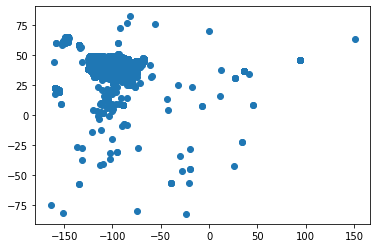

In [17]:
# Zmienne lat i long: trzeba sprawdzić lokalizacje spoza USA, których nie powinno być
x = vehicles['long']
y = vehicles['lat']
plt.plot(x,y,marker='o',linestyle="None")
plt.show()

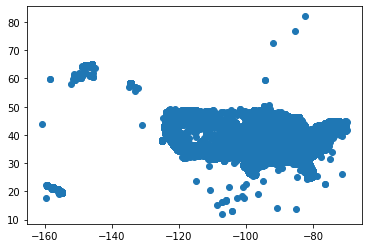

In [18]:
# Usuwamy punkty spoza USA, czyli uważając na Hawaje i Alaskę
replace1 = vehicles['long'] > -70
vehicles.loc[replace1,'long'] = np.nan
vehicles.loc[replace1,'lat'] = np.nan
replace2 = vehicles['lat'] < 10
vehicles.loc[replace2,'lat'] = np.nan
vehicles.loc[replace2,'long'] = np.nan
x = vehicles['long']
y = vehicles['lat']
plt.plot(x,y,marker='o',linestyle="None")
plt.show()

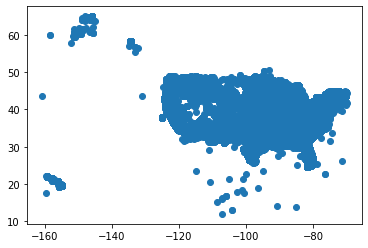

In [19]:
replace1 = vehicles['lat'] > 55
replace2 = vehicles['long'] > -120
replace = np.logical_and(replace1,replace2)
vehicles.loc[replace,'long'] = np.nan
vehicles.loc[replace,'lat'] = np.nan
x = vehicles['long']
y = vehicles['lat']
plt.plot(x,y,marker='o',linestyle="None")
plt.show()

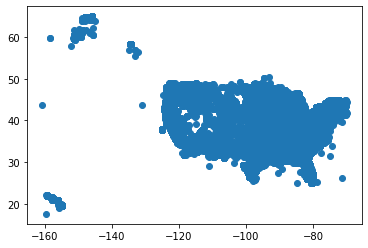

In [20]:
replace1 = vehicles['lat'] < 25
replace2 = vehicles['long'] > -120
replace = np.logical_and(replace1,replace2)
vehicles.loc[replace,'long'] = np.nan
vehicles.loc[replace,'lat'] = np.nan
x = vehicles['long']
y = vehicles['lat']
plt.plot(x,y,marker='o',linestyle="None")
plt.show()

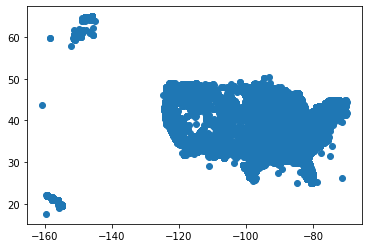

In [21]:
replace1 = vehicles['long'] > -140
replace2 = vehicles['long'] < -125
replace = np.logical_and(replace1,replace2)
vehicles.loc[replace,'long'] = np.nan
vehicles.loc[replace,'lat'] = np.nan
x = vehicles['long']
y = vehicles['lat']
plt.plot(x,y,marker='o',linestyle="None")
plt.show()


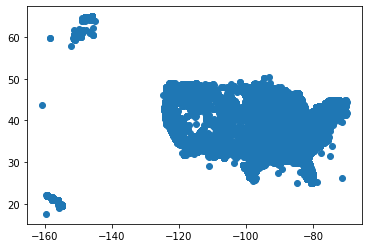

In [22]:
replace1 = vehicles['long'] > -140
replace2 = vehicles['long'] < -125
replace = np.logical_and(replace1,replace2)
vehicles.loc[replace,'long'] = np.nan
vehicles.loc[replace,'lat'] = np.nan
x = vehicles['long']
y = vehicles['lat']
plt.plot(x,y,marker='o',linestyle="None")
plt.show()

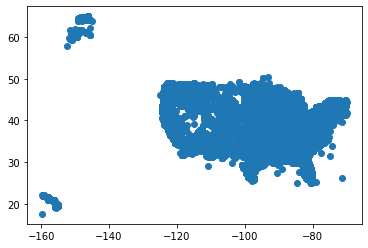

In [23]:
replace1 = vehicles['lat'] > 40
replace2 = vehicles['long'] < -157
replace = np.logical_and(replace1,replace2)
vehicles.loc[replace,'long'] = np.nan
vehicles.loc[replace,'lat'] = np.nan
x = vehicles['long']
y = vehicles['lat']
plt.plot(x,y,marker='o',linestyle="None")
plt.show()


In [24]:
# Pozostałe punkty niech zostaną, ich usunięcie wymaga bardzo dużo pracy

In [25]:
# Zmienna year: usuwamy rok produkcji 2021 oraz sprawdzamy bardzo wczesne lata

vehicles[vehicles['year'] == 2021]
replace = vehicles['year'] == 2021
vehicles.loc[replace,'year'] = np.nan

vehicles[vehicles['year'] < 1950]
vehicles[vehicles['year'] < 1940]
vehicles[vehicles['year'] < 1930]
vehicles[vehicles['year'] < 1920]

Unnamed: 0          id  \
1988          1988  7225971143   
4530          4530  7234359023   
10807        10807  7230922079   
20660        20660  7234365182   
28808        28808  7239681831   
106976      106976  7240376388   
125880      125880  7239609462   
126438      126438  7238503000   
126738      126738  7237960987   
127633      127633  7236855240   
129185      129185  7240394234   
130108      130108  7240395445   
134726      134726  7239004183   
139148      139148  7240022949   
140191      140191  7226654646   
168203      168203  7234371269   
170397      170397  7233754463   
172564      172564  7231317481   
174997      174997  7225963924   
226365      226365  7231535571   
231557      231557  7236467298   
254028      254028  7236115690   
277436      277436  7238542256   
278433      278433  7235885911   
285965      285965  7234919592   
340694      340694  7239782976   
350094      350094  7225963976   
353533      353533  7234383090   
424893      424893  7240023012   
425955      425955  7226654558   
426202      426202  7240022981   
427453      427453  7226654603   
431868      431868  7229035088   
432345      432345  7240022924   
453746      453746  7240890081   

                                                      url  \
1988    https://bham.craigslist.org/ctd/d/mount-vernon...   
4530    https://mobile.craigslist.org/ctd/d/henderson-...   
10807   https://mohave.craigslist.org/ctd/d/lake-havas...   
20660   https://littlerock.craigslist.org/ctd/d/hender...   
28808   https://goldcountry.craigslist.org/cto/d/chica...   
106976  https://miami.craigslist.org/brw/cto/d/coral-s...   
125880  https://boise.craigslist.org/ctd/d/boise-low-m...   
126438  https://boise.craigslist.org/ctd/d/boise-low-m...   
126738  https://boise.craigslist.org/ctd/d/boise-low-m...   
127633  https://boise.craigslist.org/ctd/d/boise-low-m...   
129185  https://lewiston.craigslist.org/cto/d/lewiston...   
130108  https://pullman.craigslist.org/cto/d/lewiston-...   
134726  https://chambana.craigslist.org/cto/d/foosland...   
139148  https://rockford.craigslist.org/ctd/d/huge-use...   
140191  https://rockford.craigslist.org/ctd/d/huge-use...   
168203  https://lexington.craigslist.org/ctd/d/henders...   
170397  https://louisville.craigslist.org/cto/d/fisher...   
172564  https://batonrouge.craigslist.org/cto/d/denham...   
174997  https://neworleans.craigslist.org/ctd/d/mount-...   
226365  https://billings.craigslist.org/cto/d/columbus...   
231557  https://missoula.craigslist.org/cto/d/lolo-191...   
254028  https://lasvegas.craigslist.org/cto/d/las-vega...   
277436  https://longisland.craigslist.org/cto/d/bright...   
278433  https://longisland.craigslist.org/cto/d/huntin...   
285965  https://syracuse.craigslist.org/cto/d/chittena...   
340694  https://pittsburgh.craigslist.org/cto/d/horseh...   
350094  https://charleston.craigslist.org/ctd/d/mount-...   
353533  https://greenville.craigslist.org/ctd/d/hender...   
424893  https://eauclaire.craigslist.org/ctd/d/huge-us...   
425955  https://eauclaire.craigslist.org/ctd/d/huge-us...   
426202  https://greenbay.craigslist.org/ctd/d/huge-use...   
427453  https://greenbay.craigslist.org/ctd/d/huge-use...   
431868  https://madison.craigslist.org/cto/d/middleton...   
432345  https://milwaukee.craigslist.org/ctd/d/huge-us...   
453746  https://albany.craigslist.org/cto/d/johnstown-...   

                      region                          region_url    price  \
1988              birmingham         https://bham.craigslist.org  35950.0   
4530                  mobile       https://mobile.craigslist.org  44980.0   
10807          mohave county       https://mohave.craigslist.org  15500.0   
20660            little rock   https://littlerock.craigslist.org  44980.0   
28808           gold country  https://goldcountry.craigslist.org   4000.0   
106976         south florida        https://miami.craigslist.org  11550.0   
125880                 boise        https://boi

In [26]:
# Po takich oględzinach widzimy problem tylko z danymi gdzie rok jest równy 1900
vehicles[vehicles['year'] == 1900]

Unnamed: 0          id  \
28808        28808  7239681831   
125880      125880  7239609462   
126438      126438  7238503000   
126738      126738  7237960987   
127633      127633  7236855240   
129185      129185  7240394234   
130108      130108  7240395445   
139148      139148  7240022949   
140191      140191  7226654646   
172564      172564  7231317481   
277436      277436  7238542256   
278433      278433  7235885911   
424893      424893  7240023012   
425955      425955  7226654558   
426202      426202  7240022981   
427453      427453  7226654603   
431868      431868  7229035088   
432345      432345  7240022924   
453746      453746  7240890081   

                                                      url  \
28808   https://goldcountry.craigslist.org/cto/d/chica...   
125880  https://boise.craigslist.org/ctd/d/boise-low-m...   
126438  https://boise.craigslist.org/ctd/d/boise-low-m...   
126738  https://boise.craigslist.org/ctd/d/boise-low-m...   
127633  https://boise.craigslist.org/ctd/d/boise-low-m...   
129185  https://lewiston.craigslist.org/cto/d/lewiston...   
130108  https://pullman.craigslist.org/cto/d/lewiston-...   
139148  https://rockford.craigslist.org/ctd/d/huge-use...   
140191  https://rockford.craigslist.org/ctd/d/huge-use...   
172564  https://batonrouge.craigslist.org/cto/d/denham...   
277436  https://longisland.craigslist.org/cto/d/bright...   
278433  https://longisland.craigslist.org/cto/d/huntin...   
424893  https://eauclaire.craigslist.org/ctd/d/huge-us...   
425955  https://eauclaire.craigslist.org/ctd/d/huge-us...   
426202  https://greenbay.craigslist.org/ctd/d/huge-use...   
427453  https://greenbay.craigslist.org/ctd/d/huge-use...   
431868  https://madison.craigslist.org/cto/d/middleton...   
432345  https://milwaukee.craigslist.org/ctd/d/huge-us...   
453746  https://albany.craigslist.org/cto/d/johnstown-...   

                      region                          region_url   price  \
28808           gold country  https://goldcountry.craigslist.org  4000.0   
125880                 boise        https://boise.craigslist.org     0.0   
126438                 boise        https://boise.craigslist.org     0.0   
126738                 boise        https://boise.craigslist.org     0.0   
127633                 boise        https://boise.craigslist.org     0.0   
129185  lewiston / clarkston     https://lewiston.craigslist.org     1.0   
130108      pullman / moscow      https://pullman.craigslist.org     1.0   
139148              rockford     https://rockford.craigslist.org     1.0   
140191              rockford     https://rockford.craigslist.org     1.0   
172564           baton rouge   https://batonrouge.craigslist.org  5000.0   
277436           long island   https://longisland.craigslist.org   500.0   
278433           long island   https://longisland.craigslist.org     0.0   
424893            eau claire    https://eauclaire.craigslist.org     1.0   
425955            eau claire    https://eauclaire.craigslist.org     1.0   
426202             green bay     https://greenbay.craigslist.org     1.0   
427453             green bay     https://greenbay.craigslist.org     1.0   
431868               madison      https://madison.craigslist.org     1.0   
432345             milwaukee    https://milwaukee.craigslist.org     1.0   
453746                albany       https://albany.craigslist.org  1250.0   

          year manufacturer                model  condition  ... drive  \
28808   1900.0          NaN       Suzuki Samurai        NaN  ...   NaN   
125880  1900.0         ford                truck   like new  ...   rwd   
126438  1900.0         ford                truck   like new  ...   rwd   
126738  1900.0         ford                truck   like new  ...   rwd   
127633  1900.0         ford                truck   like new  ...   rwd   
129185  1900.0          NaN                  any        NaN  ...   NaN   
130108  1900.0          NaN                  any        NaN  ...   

In [27]:
# Usuwamy wszystkie te rekordy, gdzie year to 1900
vehicles[vehicles['year'] == 1900] = np.nan
vehicles.describe()

Unnamed: 0            id          price           year  \
count  458194.000000  4.581940e+05  458030.000000  456293.000000   
mean   229104.969847  7.235233e+09   14833.503897    2010.731554   
std    132274.170952  4.594333e+06   14144.302971       8.836672   
min         0.000000  7.208550e+09       0.000000    1910.000000   
25%    114549.250000  7.231953e+09    4900.000000    2008.000000   
50%    229106.500000  7.236408e+09   10995.000000    2013.000000   
75%    343656.750000  7.239321e+09   21493.500000    2016.000000   
max    458212.000000  7.241019e+09  625000.000000    2020.000000   

           odometer            lat           long  
count  4.027270e+05  449788.000000  449788.000000  
mean   9.430301e+04      38.533141     -94.439861  
std    7.367599e+04       5.795168      17.904632  
min    0.000000e+00      17.597674    -159.713745  
25%    4.086000e+04      34.591700    -110.913236  
50%    8.760400e+04      39.233918     -88.370434  
75%    1.340000e+05      42.477800     -81.030000  
max    1.999958e+06      64.993698     -70.000579

### Zmienne znakowe (kategoryczne) 

In [28]:
# Dla wygody ponownie wywołujemy info
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    458194 non-null  float64
 1   id            458194 non-null  float64
 2   url           458194 non-null  object 
 3   region        458194 non-null  object 
 4   region_url    458194 non-null  object 
 5   price         458030 non-null  float64
 6   year          456293 non-null  float64
 7   manufacturer  439988 non-null  object 
 8   model         453348 non-null  object 
 9   condition     265263 non-null  object 
 10  cylinders     287069 non-null  object 
 11  fuel          454957 non-null  object 
 12  odometer      402727 non-null  float64
 13  title_status  455617 non-null  object 
 14  transmission  455752 non-null  object 
 15  VIN           270663 non-null  object 
 16  drive         324021 non-null  object 
 17  size          136861 non-null  object 
 18  type

In [29]:
# Zmienna region
vehicles['region'].value_counts()
# Za dużo, żeby to sensownie weryfikować

columbus               3818
rochester              3592
jacksonville           3504
springfield            3293
fayetteville           2990
                       ... 
siskiyou county          28
susanville               17
fort smith, AR           11
west virginia (old)      11
sioux city, IA            1
Name: region, Length: 405, dtype: int64

In [30]:
# Zmienna manufacturer
vehicles['manufacturer'].value_counts()
# Wygląda dobrze

ford               79662
chevrolet          64977
toyota             38576
honda              25868
nissan             23654
jeep               21165
ram                17697
gmc                17267
dodge              16730
bmw                12352
hyundai            10975
mercedes-benz      10628
subaru             10510
volkswagen         10489
kia                 8854
chrysler            7499
lexus               7119
cadillac            6743
buick               6009
mazda               5931
audi                5583
acura               4008
infiniti            3714
lincoln             3338
pontiac             3037
volvo               2866
mini                2330
mitsubishi          2301
porsche             1779
rover               1662
mercury             1645
saturn              1393
tesla               1067
jaguar              1060
fiat                 955
alfa-romeo           187
harley-davidson      139
ferrari               96
datsun                63
aston-martin          35


In [31]:
# Zmienna model
vehicles['model'].value_counts()
# Zdecydowanie za dużo wartości unikatowych, żeby to weryfikować
# Użycie tej zmiennej do modelu to dosyć słaby pomysł

f-150                                             8370
silverado 1500                                    5964
1500                                              4211
camry                                             4032
accord                                            3730
                                                  ... 
toyoya matrix                                        1
envoy limited                                        1
1960, 1961 and 1962 Alpines                          1
fit sport 5 speed manual                             1
850 glt sedan heated leather 2 owners sun roof       1
Name: model, Length: 31518, dtype: int64

In [32]:
# Zmienna condition
vehicles['condition'].value_counts()
# Wygląda dobrze

good         115685
excellent    115201
like new      24549
fair           7740
new            1428
salvage         660
Name: condition, dtype: int64

In [33]:
# Zmienna cylinders
vehicles['cylinders'].value_counts()
# Opcja 'other' lekko niepokoi ale na ten moment niech zostanie, reszta poprawna

6 cylinders     105677
4 cylinders      94767
8 cylinders      81175
5 cylinders       2058
10 cylinders      1543
other             1112
3 cylinders        550
12 cylinders       187
Name: cylinders, dtype: int64

In [34]:
# Zmienna fuel
vehicles['fuel'].value_counts()
# Wygląda dobrze

gas         399394
diesel       31069
other        16353
hybrid        5790
electric      2351
Name: fuel, dtype: int64

In [35]:
# Zmienna title_status
vehicles['title_status'].value_counts()
# Wygląda dobrze

clean         439609
rebuilt         8698
salvage         4232
lien            2091
missing          794
parts only       193
Name: title_status, dtype: int64

In [36]:
# Zmienna transmission
vehicles['transmission'].value_counts()
# Wygląda dobrze

automatic    396317
other         32175
manual        27260
Name: transmission, dtype: int64

In [37]:
# Zmienna VIN
vehicles['VIN']
# Nie jest ona dla nas istotna

0         1G1YU3DW1A5106980
1         5NPEC4AB0EH813529
2                       NaN
3                       NaN
4                       NaN
                ...        
458208                  NaN
458209                  NaN
458210                  NaN
458211    1J8HR48N78C242593
458212                  NaN
Name: VIN, Length: 458213, dtype: object

In [38]:
# Zmienna drive
vehicles['drive'].value_counts()
# Wygląda dobrze

4wd    139693
fwd    122602
rwd     61726
Name: drive, dtype: int64

In [39]:
# Zmienna size
vehicles['size'].value_counts()
# Wygląda dobrze

full-size      69732
mid-size       41782
compact        21825
sub-compact     3522
Name: size, dtype: int64

In [40]:
# Zmienna type
vehicles['type'].value_counts()
# Znowu wystepuje 'other', znowu niech zostanie

sedan          92364
SUV            79882
pickup         43343
truck          35690
other          24160
coupe          19106
hatchback      16388
wagon          10473
van             9574
convertible     6864
mini-van        6263
bus              717
offroad          647
Name: type, dtype: int64

In [41]:
# Zmienna paint_color
vehicles['paint_color'].value_counts()
# Wygląda dobrze

white     82786
black     64145
silver    46722
red       33274
blue      32746
grey      30455
custom     8843
green      7631
brown      6028
yellow     2002
orange     1970
purple      768
Name: paint_color, dtype: int64

In [42]:
# Zmienna state
vehicles['state'].value_counts()
vehicles['state'].value_counts().count()

51

In [43]:
# Wniosek: wygląda na to, że zmienne znakowe nie wymagają czyszczenia.

### Usuwanie braków danych

In [44]:
vehicles_no_nan = vehicles.dropna()
vehicles_no_nan.info()
vehicles_no_nan['manufacturer'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42269 entries, 19 to 458211
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    42269 non-null  float64
 1   id            42269 non-null  float64
 2   url           42269 non-null  object 
 3   region        42269 non-null  object 
 4   region_url    42269 non-null  object 
 5   price         42269 non-null  float64
 6   year          42269 non-null  float64
 7   manufacturer  42269 non-null  object 
 8   model         42269 non-null  object 
 9   condition     42269 non-null  object 
 10  cylinders     42269 non-null  object 
 11  fuel          42269 non-null  object 
 12  odometer      42269 non-null  float64
 13  title_status  42269 non-null  object 
 14  transmission  42269 non-null  object 
 15  VIN           42269 non-null  object 
 16  drive         42269 non-null  object 
 17  size          42269 non-null  object 
 18  type          42269 non-

ford               8709
chevrolet          6790
toyota             3420
honda              2456
nissan             2335
jeep               1813
ram                1725
gmc                1657
dodge              1517
subaru             1043
hyundai            1016
mercedes-benz       962
bmw                 939
volkswagen          846
kia                 767
chrysler            710
lexus               634
cadillac            627
mazda               547
buick               540
audi                502
acura               335
lincoln             333
volvo               327
infiniti            298
mitsubishi          292
pontiac             263
mini                172
mercury             141
rover               128
saturn              109
jaguar               87
porsche              86
fiat                 85
tesla                34
alfa-romeo            8
harley-davidson       7
ferrari               3
datsun                2
aston-martin          2
land rover            2
Name: manufactur

In [45]:
vehicles_no_nan

Unnamed: 0            id  \
19            19.0  7.235943e+09   
91            91.0  7.240570e+09   
92            92.0  7.240567e+09   
93            93.0  7.240567e+09   
95            95.0  7.240567e+09   
...            ...           ...   
458154    458154.0  7.240980e+09   
458195    458195.0  7.240981e+09   
458202    458202.0  7.240990e+09   
458204    458204.0  7.240975e+09   
458211    458211.0  7.240600e+09   

                                                      url      region  \
19      https://auburn.craigslist.org/cto/d/auburn-202...      auburn   
91      https://bham.craigslist.org/ctd/d/cartersville...  birmingham   
92      https://bham.craigslist.org/ctd/d/summerville-...  birmingham   
93      https://bham.craigslist.org/ctd/d/summerville-...  birmingham   
95      https://bham.craigslist.org/ctd/d/summerville-...  birmingham   
...                                                   ...         ...   
458154  https://milwaukee.craigslist.org/ctd/d/mukwona...   milwaukee   
458195  https://sheboygan.craigslist.org/ctd/d/manitow...   sheboygan   
458202  https://wausau.craigslist.org/ctd/d/auburndale...      wausau   
458204  https://wausau.craigslist.org/ctd/d/auburndale...      wausau   
458211  https://wyoming.craigslist.org/cto/d/sheridan-...     wyoming   

                              region_url    price    year   manufacturer  \
19         https://auburn.craigslist.org  47000.0  2020.0           jeep   
91           https://bham.craigslist.org  24999.0  2016.0  mercedes-benz   
92           https://bham.craigslist.org  41900.0  2016.0           jeep   
93           https://bham.craigslist.org  23900.0  2005.0            gmc   
95           https://bham.craigslist.org  18900.0  2012.0      chevrolet   
...                                  ...      ...     ...            ...   
458154  https://milwaukee.craigslist.org      0.0  2015.0           jeep   
458195  https://sheboygan.craigslist.org  20488.0  2010.0            gmc   
458202     https://wausau.craigslist.org   4995.0  2005.0          buick   
458204     https://wausau.craigslist.org   4495.0  2006.0          buick   
458211    https://wyoming.craigslist.org   1300.0  2008.0           jeep   

                            model  condition  ... drive       size    type  \
19                      gladiator   like new  ...   4wd  full-size  pickup   
91               benz c300 4matic   like new  ...   rwd  full-size   sedan   
92                       wrangler       good  ...   4wd  full-size     SUV   
93                    sierra 3500       good  ...   4wd  full-size   truck   
95               silverado 3500hd       good  ...   rwd  full-size   truck   
...                           ...        ...  ...   ...        ...     ...   
458154  wrangler unlimited sahara  excellent  ...   4wd  full-size     SUV   
458195                sierra 1500  excellent  ...   4wd   mid-size   truck   
458202              rendezvous cx       good  ...   fwd    compact     SUV   
458204                lacrosse cx       good  ...   fwd   mid-size   sedan   
458211             grand cherokee       good  ...   4wd   mid-size     SUV   

       paint_color                                          image_url  \
19            grey  https://images.craigslist.org/00909_kPkElEcTZ5...   
91           white  https://images.craigslist.org/00M0M_jvdDIzsekt...   
92           white  https://images.craigslist.org/00M0M_cquuYs5OeK...   
93           white  https://images.craigslist.org/00202_jIsmWQ0vhC...   
95           white  https://images.craigslist.org/00y0y_NL74aBjE1B...   
...            ...                                                ...   
458154         red  https://images.craigslist.org/00e0e_bk64cPmhJ4...   
458195       black  https://images.craigslist.org/00P0P_bnajhQgGn3...   
458202        grey  https://images.craigslist.org/00j0j_fzzhvpvful...   
458204       black  https://images.craigslist.org/01010_cdS54li18Y...   
458211       white  https://images.craigslist

In [46]:
vehicles_no_nan.describe()
# W Latex: vehicles_no_nan.describe().to_latex()

Unnamed: 0            id          price          year      odometer  \
count   42269.000000  4.226900e+04   42269.000000  42269.000000  4.226900e+04   
mean   226411.351416  7.235361e+09   13988.012326   2011.026805  1.055082e+05   
std    128970.830219  4.460512e+06   11966.831549      6.768839  6.932572e+04   
min        19.000000  7.224683e+09       0.000000   1927.000000  0.000000e+00   
25%    114720.000000  7.232337e+09    5950.000000   2008.000000  6.333500e+04   
50%    222285.000000  7.236583e+09   10995.000000   2012.000000  1.016400e+05   
75%    336899.000000  7.239360e+09   18988.000000   2015.000000  1.397750e+05   
max    458211.000000  7.241017e+09  235000.000000   2020.000000  1.939810e+06   

                lat          long  
count  42269.000000  42269.000000  
mean      38.615258    -92.237608  
std        5.601214     17.217000  
min       19.699405   -159.365637  
25%       34.900670    -98.615578  
50%       39.286850    -86.791400  
75%       42.504823    -79.857136  
max       64.823942    -70.024100

# Analiza danych

In [47]:
# Zamiast zmiennej year, lepsza może być zmienna age = 2020 - year
# 2020, gdyż przy czyszczeniu usunięto rok produkcji 2021

# I sposób - poprawny, natomiast wymaga dwukrotnego skompilowania
# age = [0]*len(vehicles_no_nan['year'])
# for i in range(len(vehicles_no_nan['year'])):
#     age[i] = 2020 - vehicles_no_nan.iloc[i,6]
# vehicles_no_nan.loc[:,'age'] = age 

# II sposób
vehicles_no_nan_age = vehicles_no_nan 
vehicles_no_nan_age['age'] = 2020 - vehicles_no_nan_age['year']
# vehicles_no_nan_age.age - wyświetlenie kolumny age ze zbioru vehicles_no_nan_age

<ipython-input-47-98d40ff9d1b2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicles_no_nan_age['age'] = 2020 - vehicles_no_nan_age['year']


In [48]:
# Od teraz rozpatrywać będziemy zbiór danych vehicles_no_nan:
vehicles_no_nan = vehicles_no_nan_age
vehicles_no_nan.age

19         0.0
91         4.0
92         4.0
93        15.0
95         8.0
          ... 
458154     5.0
458195    10.0
458202    15.0
458204    14.0
458211    12.0
Name: age, Length: 42269, dtype: float64

In [49]:
# Korelacja Pearsona
vehicles_no_nan_age.corr("pearson")

Unnamed: 0        id     price      year  odometer       lat  \
Unnamed: 0    1.000000 -0.002626  0.000246 -0.006716  0.021856  0.223379   
id           -0.002626  1.000000 -0.019242 -0.043006  0.005725 -0.056254   
price         0.000246 -0.019242  1.000000  0.303741 -0.314212  0.094567   
year         -0.006716 -0.043006  0.303741  1.000000 -0.346715 -0.000999   
odometer      0.021856  0.005725 -0.314212 -0.346715  1.000000  0.006776   
lat           0.223379 -0.056254  0.094567 -0.000999  0.006776  1.000000   
long          0.251327 -0.131702 -0.014047  0.003777  0.018511 -0.050563   
age           0.006716  0.043006 -0.303741 -1.000000  0.346715  0.000999   

                long       age  
Unnamed: 0  0.251327  0.006716  
id         -0.131702  0.043006  
price      -0.014047 -0.303741  
year        0.003777 -1.000000  
odometer    0.018511  0.346715  
lat        -0.050563  0.000999  
long        1.000000 -0.003777  
age        -0.003777  1.000000

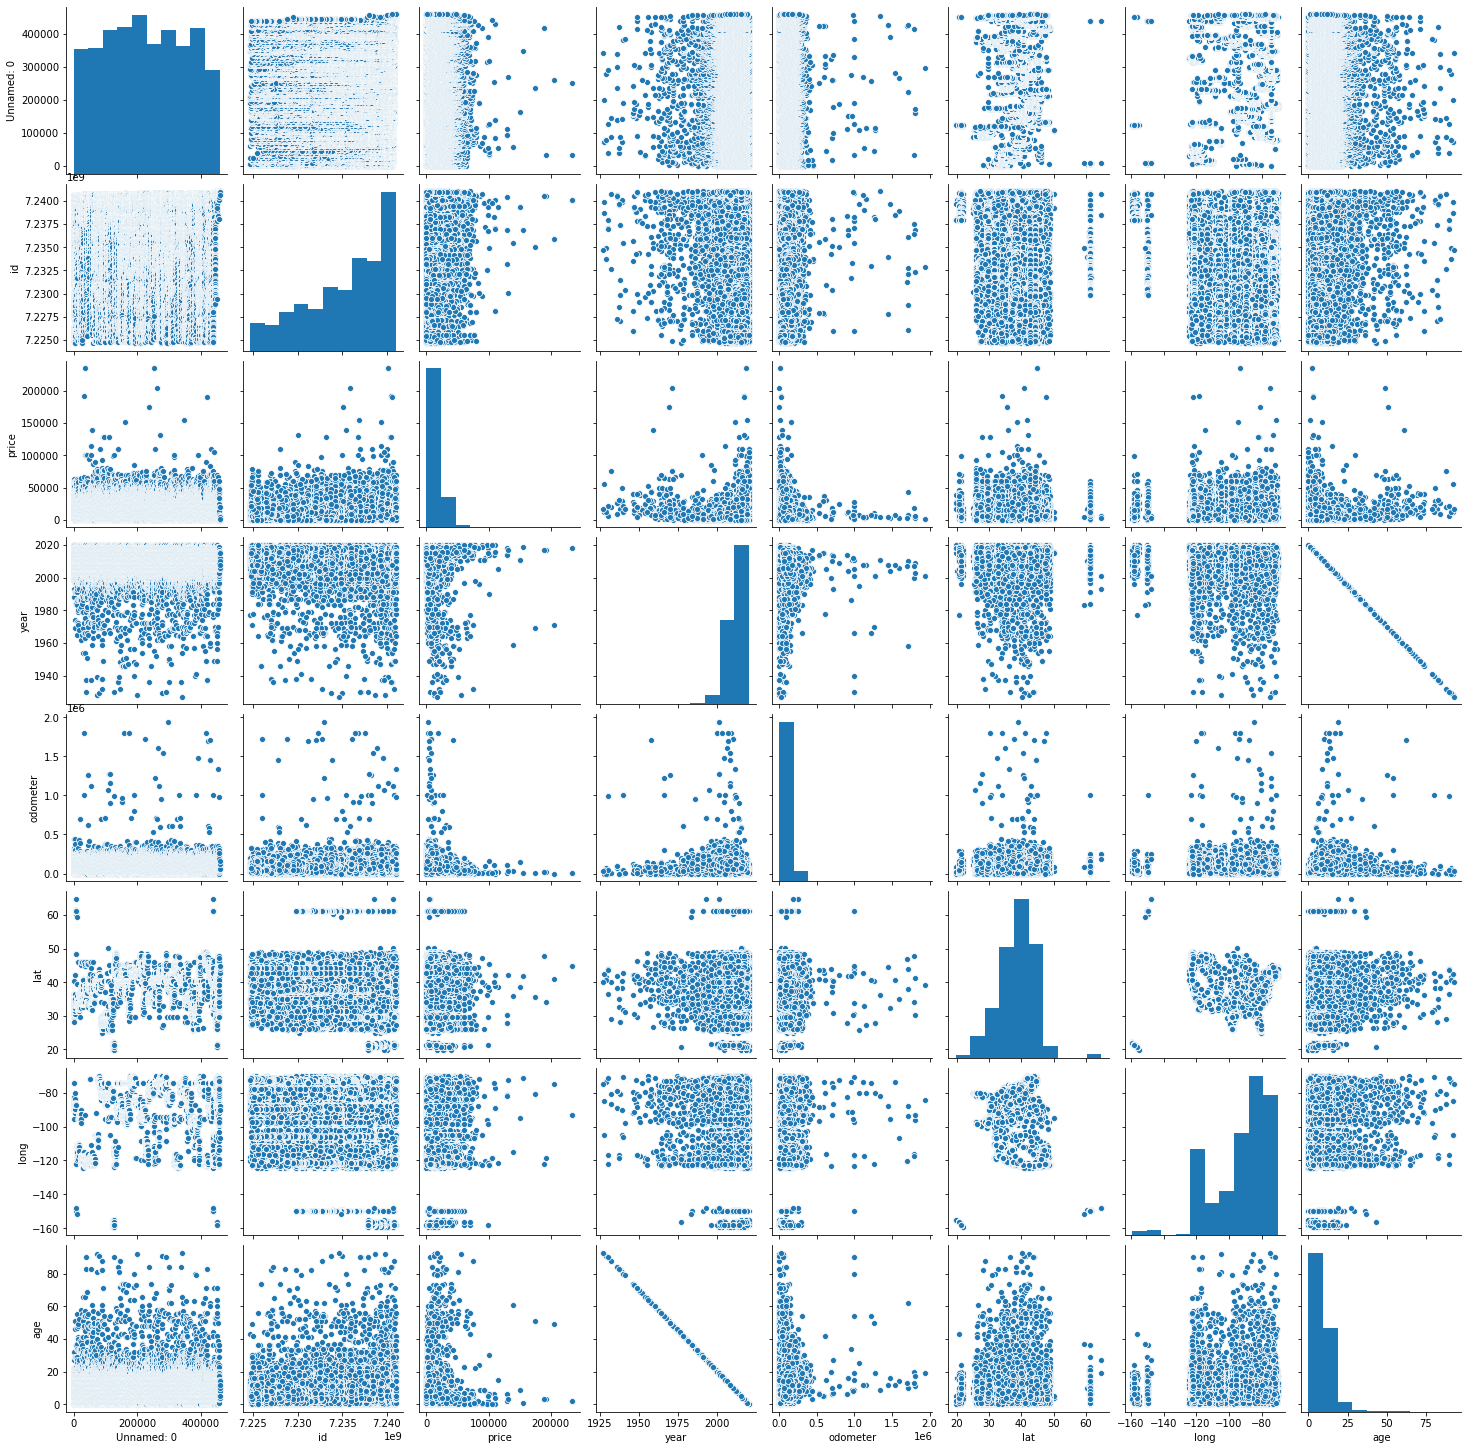

In [50]:
import seaborn as sns
# Wizualizacja korelacji przy pomocy seaborn pairplot
sns.pairplot(vehicles_no_nan_age)

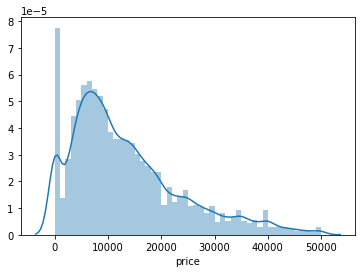

In [51]:
# Gęstości empiryczne niektórych zmiennych, bez bardzo skrajnych wartości
# price
plot = vehicles_no_nan_age['price'] < 50000
sns.distplot(vehicles_no_nan_age.loc[plot,'price'])

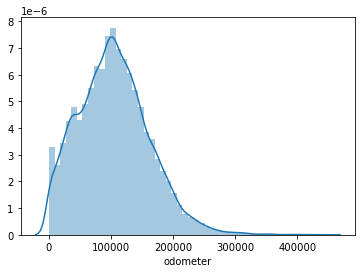

In [52]:
# odometer
plot = vehicles_no_nan_age['odometer'] < 500000
sns.distplot(vehicles_no_nan_age.loc[plot,'odometer'])

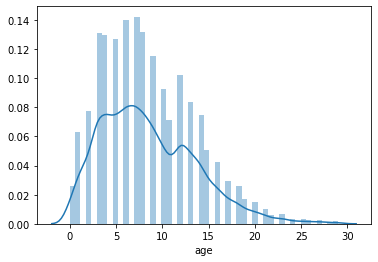

In [53]:
# age
plot = vehicles_no_nan_age['age'] < 30
sns.distplot(vehicles_no_nan_age.loc[plot,'age'])

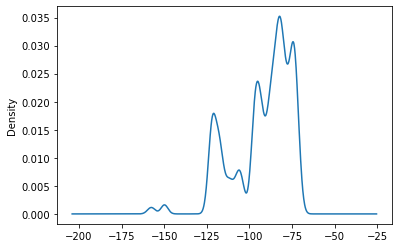

In [54]:
# Generujemy rozkład dla zmiennej long
densityplot = vehicles_no_nan_age['long'].plot(kind='density')

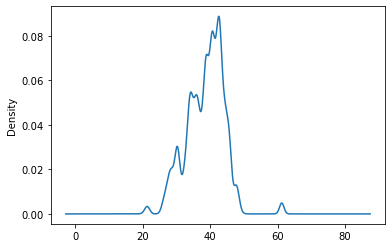

In [138]:
# Generujemy rozkład dla zmiennej lat
densityplot = vehicles_no_nan_age['lat'].plot(kind='density')

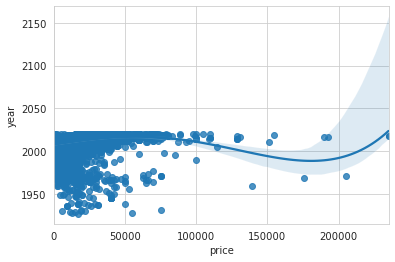

In [55]:
# Zależności między zmiennymi liczbowymi (price i year, wsp. korelacji na poziomie 0.31) wraz z linią regresji
with sns.axes_style("whitegrid"):
    sns.regplot(data=vehicles_no_nan_age, x='price', y="year", order=4) # regresja za pomocą wielomianu 4. stopnia

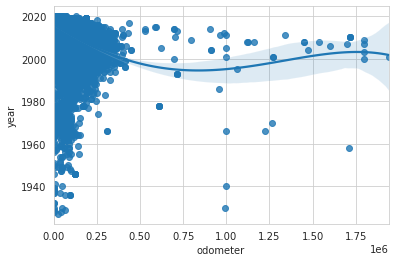

In [56]:
# Zależności między zmiennymi liczbowymi (odometer i year, wsp. korelacji na poziomie 0.35) wraz z linią regresji
with sns.axes_style("whitegrid"):
    sns.regplot(data=vehicles_no_nan_age, x='odometer', y="year", order=4) # regresja za pomocą wielomianu 4. stopnia

In [57]:
# Sprawdzenie zależności ceny od niektórych zmiennych kategorycznych
# Dla wygody:
vehicles_no_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42269 entries, 19 to 458211
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    42269 non-null  float64
 1   id            42269 non-null  float64
 2   url           42269 non-null  object 
 3   region        42269 non-null  object 
 4   region_url    42269 non-null  object 
 5   price         42269 non-null  float64
 6   year          42269 non-null  float64
 7   manufacturer  42269 non-null  object 
 8   model         42269 non-null  object 
 9   condition     42269 non-null  object 
 10  cylinders     42269 non-null  object 
 11  fuel          42269 non-null  object 
 12  odometer      42269 non-null  float64
 13  title_status  42269 non-null  object 
 14  transmission  42269 non-null  object 
 15  VIN           42269 non-null  object 
 16  drive         42269 non-null  object 
 17  size          42269 non-null  object 
 18  type          42269 non-

In [58]:
# Zmienna state
cena_stan = vehicles_no_nan.groupby('state').mean()['price']
cena_stan

state
ak    19467.553977
al    16166.291572
ar     8583.673171
az    14427.854264
ca    13394.611421
co    15173.688679
ct    12197.935950
dc    10259.076923
de    17578.467890
fl    13234.267391
ga    10965.512931
hi    16945.062271
ia    15003.097876
id    14050.019868
il    13499.401515
in    14168.734072
ks    12922.140915
ky    13738.094340
la    13057.566802
ma    14048.227191
md    11495.362637
me    18936.914286
mi    15958.003814
mn    16063.008945
mo    12883.073930
ms    18034.482759
mt    19866.181658
nc    12522.899090
nd    17834.163743
ne    18605.430894
nh    14583.005236
nj    12945.943262
nm    16845.128527
nv    13386.162162
ny    16236.357522
oh     9781.555791
ok     8082.490300
or    13132.747343
pa    12702.117880
ri    12182.474576
sc     9936.795848
sd    21940.063636
tn    17466.076063
tx    14419.726365
ut    17353.917949
va    10589.593067
vt    17260.435821
wa    13070.000000
wi    15698.332591
wv    18185.755102
wy    26995.889868
Name: price, dtype: float

In [59]:
# Zmienna manufacturer
cena_marka = vehicles_no_nan.groupby('manufacturer').mean()['price']
cena_marka

manufacturer
acura               10078.695522
alfa-romeo          20349.000000
aston-martin        42897.500000
audi                18053.820717
bmw                 13477.133120
buick               10931.674074
cadillac            14185.582137
chevrolet           15476.517378
chrysler             8409.214085
datsun              15249.500000
dodge               11199.883322
ferrari            194966.666667
fiat                 7659.576471
ford                17160.309220
gmc                 17827.901026
harley-davidson     15136.285714
honda                9568.254479
hyundai              8091.591535
infiniti            12107.785235
jaguar              13424.770115
jeep                14975.357970
kia                  8430.282920
land rover          20750.000000
lexus               12033.124606
lincoln             12330.564565
mazda                8206.113346
mercedes-benz       16332.378378
mercury              4212.560284
mini                 9442.825581
mitsubishi          13264.0958

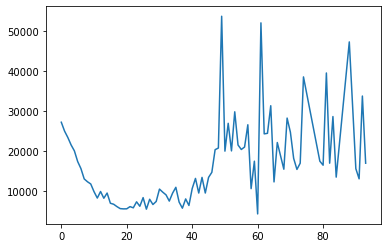

In [60]:
# Zmienna age
cena_wiek = vehicles_no_nan.groupby('age').mean()['price']
cena_wiek
plt.plot(cena_wiek)

In [61]:
# Zmienna condition
cena_stan = vehicles_no_nan.groupby('condition').mean()['price']
cena_stan

condition
excellent    13735.360692
fair          3662.327273
good         13362.667973
like new     18390.584376
new          18340.808219
salvage       3418.250000
Name: price, dtype: float64

In [62]:
# Zmienna condition
cena_stan = vehicles_no_nan.groupby('condition').mean()['price']
cena_stan

condition
excellent    13735.360692
fair          3662.327273
good         13362.667973
like new     18390.584376
new          18340.808219
salvage       3418.250000
Name: price, dtype: float64

In [63]:
# Zmienna cylinders
cena_cylindry = vehicles_no_nan.groupby('cylinders').mean()['price']
cena_cylindry

cylinders
10 cylinders    10199.635359
12 cylinders    17749.875000
3 cylinders     11370.984615
4 cylinders     10043.466417
5 cylinders      7122.085714
6 cylinders     13472.775009
8 cylinders     19457.405940
other           19489.414141
Name: price, dtype: float64

In [64]:
# Zmienna paint_color
cena_farba = vehicles_no_nan.groupby('paint_color').mean()['price']
cena_farba

paint_color
black     14894.278153
blue      11999.867564
brown     11063.560636
custom    13007.471848
green     10546.740860
grey      13213.875716
orange    13803.772021
purple     9050.538462
red       13667.817263
silver    11771.986065
white     16463.572650
yellow    15507.014354
Name: price, dtype: float64

In [65]:
# Zmienna size
cena_wielkosc = vehicles_no_nan.groupby('size').mean()['price']
cena_wielkosc

size
compact         9417.086810
full-size      16518.879578
mid-size       11292.460948
sub-compact    12112.596407
Name: price, dtype: float64

In [66]:
# Zmienna drive
cena_naped = vehicles_no_nan.groupby('drive').mean()['price']
cena_naped

drive
4wd    17915.375864
fwd     8594.394165
rwd    15137.150928
Name: price, dtype: float64

In [67]:
# Funkcja agregująca
def peak_to_peak(arr):
    return arr.max() - arr.min() # funkcja peak_to_peak zwraca rozstęp między wartościami skrajnymi
cena_wielkosc.agg(peak_to_peak)
cena_wielkosc.agg(['mean', 'std', peak_to_peak])

mean            12335.255936
std              3008.621859
peak_to_peak     7101.792767
Name: price, dtype: float64

### Grupowanie danych 

In [68]:
# Grupowanie cen pojazdów ze względu na wiek pojazdu i jego stan
grouped = vehicles_no_nan.groupby(['condition', 'age'])
grouped
grouped.agg('mean')
# Definiujemy funkcję agregującą
def peak_to_peak(arr):
    return arr.max() - arr.min()
grouped.agg(peak_to_peak)
grouped.agg(['mean', 'std', peak_to_peak])['price']

mean           std  peak_to_peak
condition age                                           
excellent 0.0   18787.444853  20754.891027       70330.0
          1.0   24258.085781  17548.954093       88950.0
          2.0   22259.815567  15031.438011       82990.0
          3.0   20567.856649  13422.883501      130995.0
          4.0   17695.020071  12689.254792      109995.0
...                      ...           ...           ...
salvage   28.0   1200.000000           NaN           0.0
          34.0   1500.000000           NaN           0.0
          38.0   3500.000000           NaN           0.0
          51.0   1200.000000           NaN           0.0
          90.0   5500.000000           NaN           0.0

[308 rows x 3 columns]

In [69]:
# Szukamy po 5 skrajnych wartości ceny pojazdów ze względu na jego stan
def top(df, n=5, column='price'):
    return df.sort_values(by=column)[-n:]
top(vehicles_no_nan, n=6)
vehicles_no_nan.groupby('condition').apply(top)['price']

condition        
excellent  95023     129000.0
           270072    130995.0
           58086     139000.0
           161882    151078.0
           237017    175500.0
fair       426091     19990.0
           210589     24900.0
           452177     24900.0
           254117     40000.0
           37883      99999.0
good       315064     97995.0
           53194      99900.0
           53190     114900.0
           111706    129000.0
           346990    154900.0
like new   417792    189998.0
           33300     192500.0
           260609    205000.0
           251638    235000.0
           34041     235000.0
new        134960     69870.0
           124613     70895.0
           315042     71019.0
           252235     72800.0
           356812     78855.0
salvage    41211       9500.0
           26863       9999.0
           377550     10950.0
           15143      13000.0
           42985      13500.0
Name: price, dtype: float64

### Wizualizacja danych 

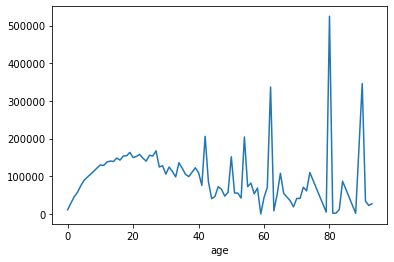

In [70]:
# Wykres średniego rocznego przebiegu pojazdu w zależności od wieku samochodu
vehicles_no_nan["odometer"].groupby(vehicles_no_nan["age"]).agg(np.mean).plot()

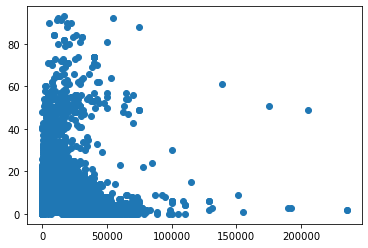

In [71]:
# Wykres rozproszenia - zależność ceny samochodu od jego wieku
plt.scatter(vehicles_no_nan.price, vehicles_no_nan.age) 
plt.show()

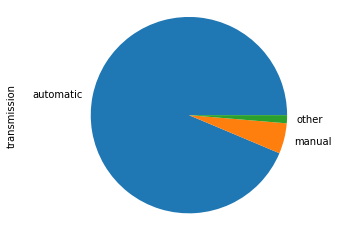

In [72]:
# Wykres kołowy - zmienna transmission
vehicles_no_nan.transmission.value_counts().plot(kind="pie") 
plt.axis("equal")
plt.show()

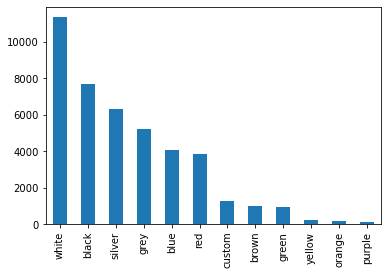

In [73]:
# Histogram - zmienna paint_color
vehicles_no_nan.paint_color.value_counts().plot(kind="bar") 
plt.show()

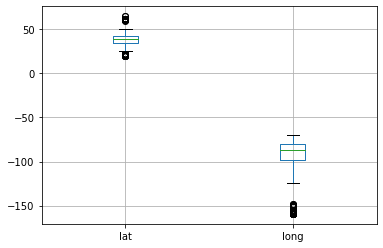

In [74]:
# Boxplot - zmienne: lat i long
boxplots = vehicles_no_nan.drop(columns=['Unnamed: 0' ,'id','price','year','odometer', 'age'],axis=1).boxplot(return_type='axes')
# Widzimy z wyresu: wartość średnią, rozstęp kwartylowy i wartości odstające

# Modelowanie danych

In [75]:
# Dla przypomnienia:
vehicles_no_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42269 entries, 19 to 458211
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    42269 non-null  float64
 1   id            42269 non-null  float64
 2   url           42269 non-null  object 
 3   region        42269 non-null  object 
 4   region_url    42269 non-null  object 
 5   price         42269 non-null  float64
 6   year          42269 non-null  float64
 7   manufacturer  42269 non-null  object 
 8   model         42269 non-null  object 
 9   condition     42269 non-null  object 
 10  cylinders     42269 non-null  object 
 11  fuel          42269 non-null  object 
 12  odometer      42269 non-null  float64
 13  title_status  42269 non-null  object 
 14  transmission  42269 non-null  object 
 15  VIN           42269 non-null  object 
 16  drive         42269 non-null  object 
 17  size          42269 non-null  object 
 18  type          42269 non-

In [76]:
# Usuwamy zbędne zmienne, czyli te które ciężko sensownie zinterpretować lub są z wartościami 'other'
vehicles_no_nan = vehicles_no_nan.drop(columns=['Unnamed: 0' ,'id','url','region_url','region',
                                                'model','title_status','VIN','image_url',
                                               'description','year','posting_date'],axis=1)
vehicles_no_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42269 entries, 19 to 458211
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         42269 non-null  float64
 1   manufacturer  42269 non-null  object 
 2   condition     42269 non-null  object 
 3   cylinders     42269 non-null  object 
 4   fuel          42269 non-null  object 
 5   odometer      42269 non-null  float64
 6   transmission  42269 non-null  object 
 7   drive         42269 non-null  object 
 8   size          42269 non-null  object 
 9   type          42269 non-null  object 
 10  paint_color   42269 non-null  object 
 11  state         42269 non-null  object 
 12  lat           42269 non-null  float64
 13  long          42269 non-null  float64
 14  age           42269 non-null  float64
dtypes: float64(5), object(10)
memory usage: 6.2+ MB


In [77]:
# Konwersja zmiennych kategorycznych na numeryczne - sposób NIEoptymalny dla metod z wykorzystaniem odległości:
# stwórzmy mapę, która zamieni nam te pojedyncze wartości na nową wersję
# size_map = {'full-size': 100, 'mid-size': 010, 'compact': 001, 'sub-compact': 0100}
#size_map = {'full-size': 1, 'mid-size': 2, 'compact': 3, 'sub-compact': 4}
#vehicles_no_nan["size"].replace(size_map, inplace=True)
#vehicles_no_nan["size"].value_counts()
# condition
#condition_map = {'excellent': 1, 'fair': 2, 'good': 3, 'like new': 4, 'new': 5, 'salvage': 6}
#vehicles_no_nan["condition"].replace(condition_map, inplace=True)
#vehicles_no_nan["condition"].value_counts()
# title_status
#title_status_map = {'clean': 1, 'rebuilt': 2, 'salvage': 3, 'lien': 4, 'missing': 5, 'parts only': 6}
#vehicles_no_nan["title_status"].replace(title_status_map, inplace=True)
#vehicles_no_nan["title_status"].value_counts()
# drive
#drive_map = {'4wd': 1, 'fwd': 2, 'rwd': 3}
#vehicles_no_nan["drive"].replace(drive_map, inplace=True)
#vehicles_no_nan["drive"].value_counts()                
# paint_color
#paint_color_map = {'white': 1, 'black': 2, 'silver': 3, 'red': 4, 'blue': 5, 'grey': 6, 'custom': 7, 'green': 8, 'brown': 9, 'yellow': 10, 'orange': 11, 'purple': 12}
#vehicles_no_nan["paint_color"].replace(paint_color_map, inplace=True)
#vehicles_no_nan["paint_color"].value_counts()  
# Korelacja Pearsona z nowymi wartościami wybranych zmiennych kategorycznych
#vehicles_no_nan.corr("pearson")

In [78]:
# Poprawna konwersja zmiennych kategorycznych na numeryczne:
# size
mapping_size = pd.get_dummies(vehicles_no_nan['size'])
vehicles_no_nan = pd.concat([vehicles_no_nan, mapping_size],axis=1)
# manufacturer
mapping_manufacturer = pd.get_dummies(vehicles_no_nan["manufacturer"])
vehicles_no_nan = pd.concat([vehicles_no_nan, mapping_manufacturer],axis=1)
# condition
mapping_condition = pd.get_dummies(vehicles_no_nan["condition"])
vehicles_no_nan = pd.concat([vehicles_no_nan, mapping_condition],axis=1)
# cylinders
mapping_cylinders = pd.get_dummies(vehicles_no_nan["cylinders"])
vehicles_no_nan = pd.concat([vehicles_no_nan, mapping_cylinders],axis=1)
# fuel
mapping_fuel = pd.get_dummies(vehicles_no_nan["fuel"])
vehicles_no_nan = pd.concat([vehicles_no_nan, mapping_fuel],axis=1)
# transmission
mapping_transmission = pd.get_dummies(vehicles_no_nan["transmission"])
vehicles_no_nan = pd.concat([vehicles_no_nan, mapping_transmission],axis=1)
# drive
mapping_drive = pd.get_dummies(vehicles_no_nan["drive"])
vehicles_no_nan = pd.concat([vehicles_no_nan, mapping_drive],axis=1)
# type
mapping_type = pd.get_dummies(vehicles_no_nan["type"])
vehicles_no_nan = pd.concat([vehicles_no_nan, mapping_type],axis=1)
# paint_color
mapping_paint_color = pd.get_dummies(vehicles_no_nan["paint_color"])
vehicles_no_nan = pd.concat([vehicles_no_nan, mapping_paint_color],axis=1)
# state
mapping_state = pd.get_dummies(vehicles_no_nan["state"])
vehicles_no_nan = pd.concat([vehicles_no_nan, mapping_state],axis=1)

In [79]:
# Usuwamy zmienne do modelu
vehicles_no_nan = vehicles_no_nan.drop(columns=['size',"manufacturer","condition",
                                               "cylinders","fuel","transmission",
                                               "drive","type","paint_color"
                                               ,"state"],axis=1)
vehicles_no_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42269 entries, 19 to 458211
Columns: 151 entries, price to wy
dtypes: float64(5), uint8(146)
memory usage: 8.8 MB


In [80]:
# Liczymy korelację Spearmana:
corr_S = vehicles_no_nan.corr("spearman")
corr_S.shape
corr_S # dostaniemy macierz korelacji
# pierwszych 5 jej zmiennych to pierwotne zmienne numeryczne, kolejne to skonwertowane na numeryczne dawne zmienne kategoryczne

price  odometer       lat      long       age   compact  \
price     1.000000 -0.387340  0.131203 -0.005696 -0.476833 -0.149111   
odometer -0.387340  1.000000 -0.004145 -0.001053  0.584378 -0.075897   
lat       0.131203 -0.004145  1.000000  0.064053 -0.012357 -0.038341   
long     -0.005696 -0.001053  0.064053  1.000000  0.023831 -0.063258   
age      -0.476833  0.584378 -0.012357  0.023831  1.000000 -0.012938   
...            ...       ...       ...       ...       ...       ...   
vt        0.069233 -0.082698  0.192990  0.232883 -0.100873  0.034816   
wa       -0.011257  0.011716  0.155681 -0.144933  0.035615  0.020614   
wi        0.031327  0.007292  0.217788 -0.023697 -0.020498 -0.021230   
wv        0.014757  0.016358  0.004402  0.048368  0.017135 -0.008677   
wy        0.064224 -0.029407  0.084230 -0.071851 -0.044640 -0.016116   

          full-size  mid-size  sub-compact     acura  ...        sd        tn  \
price      0.241282 -0.147355    -0.026275 -0.027422  ...  0.037655  0.049226   
odometer   0.124458 -0.068176    -0.041842  0.024849  ... -0.013076  0.014892   
lat        0.007482  0.023316    -0.014444 -0.013643  ...  0.092108 -0.096488   
long       0.089917 -0.035219    -0.057023 -0.003087  ... -0.060387  0.028140   
age        0.024885 -0.025583     0.025960  0.029620  ... -0.018293 -0.028531   
...             ...       ...          ...       ...  ...       ...       ...   
vt        -0.051052  0.033880    -0.010995 -0.003441  ... -0.011288 -0.022940   
wa        -0.023014  0.009483     0.002729  0.014141  ... -0.006880 -0.013982   
wi        -0.009317  0.026368    -0.004461 -0.007102  ... -0.013123 -0.026669   
wv         0.018366 -0.011637    -0.006843 -0.004309  ... -0.003487 -0.007086   
wy         0.001878  0.011080    -0.005779 -0.006568  ... -0.005315 -0.010801   

                tx        ut        va        vt        wa        wi  \
price     0.002192  0.021210 -0.059293  0.069233 -0.011257  0.031327   
odometer  0.002517 -0.003143  0.061300 -0.082698  0.011716  0.007292   
lat      -0.264757  0.032001 -0.055392  0.192990  0.155681  0.217788   
long     -0.150869 -0.065349  0.176672  0.232883 -0.144933 -0.023697   
age      -0.019668  0.018550  0.070987 -0.100873  0.035615 -0.020498   
...            ...       ...       ...       ...       ...       ...   
vt       -0.031976 -0.010624 -0.028096  1.000000 -0.014844 -0.028314   
wa       -0.019489 -0.006476 -0.017124 -0.014844  1.000000 -0.017257   
wi       -0.037173 -0.012351 -0.032663 -0.028314 -0.017257  1.000000   
wv       -0.009877 -0.003282 -0.008679 -0.007523 -0.004585 -0.008746   
wy       -0.015056 -0.005002 -0.013229 -0.011467 -0.006989 -0.013331   

                wv        wy  
price     0.014757  0.064224  
odometer  0.016358 -0.029407  
lat       0.004402  0.084230  
long      0.048368 -0.071851  
age       0.017135 -0.044640  
...            ...       ...  
vt       -0.007523 -0.011467  
wa       -0.004585 -0.006989  
wi       -0.008746 -0.013331  
wv        1.000000 -0.003542  
wy       -0.003542  1.000000  

[151 rows x 151 columns]

In [81]:
# Wyświetlamy korelacje, dla których wartość korelacji jest większa niż |0.5|
corr_S_tri = corr_S.where(np.triu(np.ones(corr_S.shape, dtype=np.bool), k=1)).stack().sort_values()
corr_S_tri[abs(corr_S_tri)>0.5]

automatic     manual        -0.882524
diesel        gas           -0.869682
excellent     good          -0.760071
full-size     mid-size      -0.740732
4wd           fwd           -0.664728
4 cylinders   6 cylinders   -0.514308
              fwd            0.503433
10 cylinders  other          0.521862
tesla         electric       0.543217
odometer      age            0.584378
other         electric       0.655176
dtype: float64

### Model liniowy z wykorzystaniem regresji liniowej 

In [82]:
# Tworzymy model regresji liniowej
import sklearn.linear_model # importujemy pakiet sklearn
mnk = sklearn.linear_model.LinearRegression() # w ten sposób wyświetlimy parametry modelu
mnk

LinearRegression()

In [83]:
X = vehicles_no_nan.drop(columns=['price'],axis=1) # X - zbiór z predyktorami (zm. objaśniającymi)
y = vehicles_no_nan[['price']] # y - zmienna celu (zm. objaśniana)
# Chcemy nauczyć model, robimy to za pomocą fit
mnk.fit(X,y) 

LinearRegression()

In [84]:
mnk.intercept_ # to jest wyraz wolny
mnk.coef_ # to są wartości współczynników dla zm. niezależnych

array([[-4.39295457e-02,  3.08047277e+02,  1.21537404e+02,
        -4.19350499e+02, -8.47640989e+02,  1.46679730e+03,
        -3.88898744e+02, -2.30257564e+02, -5.37946943e+03,
         2.25091777e+03,  9.50030621e+03, -2.34436928e+03,
        -5.71347166e+03, -5.15042279e+03, -4.74320264e+03,
        -6.58101407e+03, -8.25138091e+03,  8.94236459e+03,
        -8.20283984e+03,  1.62236668e+05, -9.94726706e+03,
        -6.29145614e+03, -6.31979807e+03, -8.21228163e+03,
        -5.37527649e+03, -7.49408372e+03, -6.28749651e+03,
        -5.27885379e+03, -5.39436966e+03, -8.10683722e+03,
        -4.21293983e+03, -4.43312671e+03, -6.90093593e+03,
        -7.14819439e+03, -3.68196148e+03, -9.33152366e+03,
        -7.68437057e+03, -6.36015442e+03, -7.58029246e+03,
        -6.65856666e+03,  8.40300196e+03, -6.25176893e+03,
        -9.49523010e+01, -7.38892807e+03, -7.16420341e+03,
         2.54958423e+04, -4.10650518e+03, -7.44405266e+03,
        -5.31273337e+03,  3.81526152e+02, -3.16285768e+0

In [85]:
# Współczynnik determinacji R2 (funkcja score to robi)
mnk.score(X,y)

0.4841803632538012

In [86]:
# Uwaga: im bliżej 1 ma R^2, tym lepsze jest dopasowanie modelu
# U nas wartość to 0.48, więc jest nienajlepiej

In [87]:
y_pred = mnk.predict(X) # w ten sposób możemy zobaczyć, jak wygląda predykcja dla całego zbioru

In [88]:
# Sprawdźmy wartości dla pierwszych 10 zmiennych z predykcji
y_pred[0:9]

array([[30280.41674923],
       [22830.89875573],
       [23095.07684361],
       [28232.25725764],
       [27472.26985633],
       [14561.5519064 ],
       [26058.33372549],
       [21784.89883343],
       [18432.85052608]])

In [89]:
# A tu dla porównania sprawdźmy wartości dla pierwszych 10 zmiennych rzeczywistych
y[0:9]

price
19   47000.0
91   24999.0
92   41900.0
93   23900.0
95   18900.0
96   14916.0
97   21900.0
108  63200.0
132  34990.0

In [90]:
# II sposób na obliczenie R2, z wykorzystaniem sklearn
sklearn.metrics.r2_score(y, y_pred)

0.4841803632538012

In [91]:
# Obliczmy jeszcze inne miary błędów dopasowania:

In [92]:
# 1. MSE - średni błąd kwadratowy
sklearn.metrics.mean_squared_error(y, y_pred)  

73866233.07969068

In [93]:
# 2. MAE - średni błąd całkowity
sklearn.metrics.mean_absolute_error(y, y_pred)

5470.228958940222

In [94]:
#3. MedAE - błąd medianowy
sklearn.metrics.median_absolute_error(y, y_pred)

3588.1951400396974

In [95]:
# Chcemy polepszyć zdolność predykcyjną modelu, dlatego podzielimy cały zbiór na uczący i testowy
# Zatem dzielimy zbiór na próbę uczącą (80%) i testową (20%)
X_ucz, X_test, y_ucz, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=12345)
print(X_ucz.shape)
print(X_test.shape)
print(y_ucz.shape)
print(y_test.shape)

(33815, 150)
(8454, 150)
(33815, 1)
(8454, 1)


In [96]:
# Stworzymy funkcję, która dopasowuje model regresji liniowej do danej próby oraz oblicza miary błędów dopasowania
def fit_regression(model, X_ucz, X_test, y_ucz, y_test):
    model.fit(X_ucz, y_ucz)
    y_ucz_pred = model.predict(X_ucz)
    y_test_pred = model.predict(X_test)
    r2 = sklearn.metrics.r2_score
    mse = sklearn.metrics.mean_squared_error
    mae = sklearn.metrics.mean_absolute_error
    medae = sklearn.metrics.median_absolute_error
    return {
        "r_score_u": r2(y_ucz, y_ucz_pred),
        "r_score_t": r2(y_test, y_test_pred),
        "MSE_u": mse(y_ucz, y_ucz_pred),
        "MSE_t": mse(y_test, y_test_pred),
        "MAE_u": mae(y_ucz, y_ucz_pred),
        "MAE_t": mae(y_test, y_test_pred),
        "MEDAE_u": medae(y_ucz, y_ucz_pred),
        "MEDAE_t": medae(y_test, y_test_pred)
    }

In [97]:
# Przedstawiamy działanie powyższej funkcji oraz wyniki
model_names = ["Reg. liniowa"] # tworzymy zawsze etykietę dla naszej ramki danych
res = [fit_regression(sklearn.linear_model.LinearRegression(), X_ucz, X_test, y_ucz, y_test)]
df_results_errors = pd.DataFrame(res, index=model_names)

In [98]:
df_results_errors

r_score_u  r_score_t         MSE_u         MSE_t        MAE_u  \
Reg. liniowa   0.489488   0.460873  7.169577e+07  8.315830e+07  5443.684641   

                    MAE_t      MEDAE_u      MEDAE_t  
Reg. liniowa  5576.709962  3579.078677  3669.913298

In [99]:
# Sprawdźmy wpływ podziału na zb. treningowy i uczący, tu: 30% - testowy, 70% - uczący
X_ucz70, X_test70, y_ucz70, y_test70 = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=12345)
model_names = ["Reg. liniowa 70"] 
res = [fit_regression(sklearn.linear_model.LinearRegression(), X_ucz70, X_test70, y_ucz70, y_test70)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index=model_names))
df_results_errors # Wniosek: R^2 minimalnie wzrosło, więc dla większej próby danych model jest minimalnie lepszy

r_score_u  r_score_t         MSE_u         MSE_t  \
Reg. liniowa      0.489488   0.460873  7.169577e+07  8.315830e+07   
Reg. liniowa 70   0.490284   0.466266  7.236334e+07  7.796793e+07   

                       MAE_u        MAE_t      MEDAE_u      MEDAE_t  
Reg. liniowa     5443.684641  5576.709962  3579.078677  3669.913298  
Reg. liniowa 70  5462.683515  5505.866181  3596.185772  3607.461873

In [100]:
# Sprawdźmy wpływ podziału na zb. treningowy i uczący, tu: 35% - testowy, 65% - uczący
X_ucz65, X_test65, y_ucz65, y_test65 = sklearn.model_selection.train_test_split(X, y, test_size=0.35, random_state=12345)
model_names = ["Reg. liniowa 65"] 
res = [fit_regression(sklearn.linear_model.LinearRegression(), X_ucz65, X_test65, y_ucz65, y_test65)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index=model_names))
# Sprawdźmy wpływ podziału na zb. treningowy i uczący, tu: 25% - testowy, 75% - uczący
X_ucz75, X_test75, y_ucz75, y_test75 = sklearn.model_selection.train_test_split(X, y, test_size=0.25, random_state=12345)
model_names = ["Reg. liniowa 75"] 
res = [fit_regression(sklearn.linear_model.LinearRegression(), X_ucz75, X_test75, y_ucz75, y_test75)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index=model_names))
# Sprawdźmy wpływ podziału na zb. treningowy i uczący, tu: 15% - testowy, 85% - uczący
X_ucz85, X_test85, y_ucz85, y_test85 = sklearn.model_selection.train_test_split(X, y, test_size=0.15, random_state=12345)
model_names = ["Reg. liniowa 85"] 
res = [fit_regression(sklearn.linear_model.LinearRegression(), X_ucz85, X_test85, y_ucz85, y_test85)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index=model_names))
df_results_errors 

r_score_u  r_score_t         MSE_u         MSE_t  \
Reg. liniowa      0.489488   0.460873  7.169577e+07  8.315830e+07   
Reg. liniowa 70   0.490284   0.466266  7.236334e+07  7.796793e+07   
Reg. liniowa 65   0.488545   0.472568  7.237035e+07  7.719569e+07   
Reg. liniowa 75   0.490556   0.462084  7.188204e+07  8.042283e+07   
Reg. liniowa 85   0.487171   0.461919  7.329389e+07  7.790887e+07   

                       MAE_u        MAE_t      MEDAE_u      MEDAE_t  
Reg. liniowa     5443.684641  5576.709962  3579.078677  3669.913298  
Reg. liniowa 70  5462.683515  5505.866181  3596.185772  3607.461873  
Reg. liniowa 65  5464.513893  5506.333081  3603.171243  3627.817331  
Reg. liniowa 75  5441.713990  5563.775209  3564.373613  3676.652912  
Reg. liniowa 85  5462.333124  5549.841896  3587.508951  3682.727916

In [101]:
# Niestety regresja liniowa nie dała dobrego dopasowania

### Procesy Gaussowskie 

In [102]:
# GPR na zbiorze ograniczonym do 1000 losowych (r.jednostajny) danych, ze względu na długi czas kompilowania

In [103]:
vehicles_no_nan_small = vehicles_no_nan.sample(n=1000)

X = vehicles_no_nan_small.drop(columns=['price'],axis=1)
y = vehicles_no_nan_small[['price']]

In [104]:
import sklearn.gaussian_process as gp
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, WhiteKernel

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [106]:
kernel = ConstantKernel(1.0) + ConstantKernel(1.0) * RBF(10)  + WhiteKernel(5)
model = GaussianProcessRegressor(kernel=kernel)
model.fit(X_train, y_train)

GaussianProcessRegressor(kernel=1**2 + 1**2 * RBF(length_scale=10) + WhiteKernel(noise_level=5))

In [107]:
y_pred_tr, y_pred_tr_std = model.predict(X_train, return_std=True)
y_pred_te, y_pred_te_std = model.predict(X_test, return_std=True)

In [108]:
model.kernel_

316**2 + 316**2 * RBF(length_scale=1e-05) + WhiteKernel(noise_level=1e+05)

Text(0, 0.5, 'Predicted')

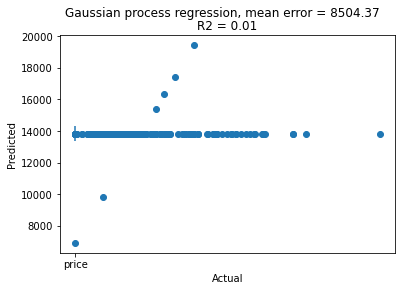

In [109]:
plt.figure()
plt.errorbar(y_test, y_pred_te, yerr=y_pred_te_std, fmt='o')
plt.title('R2 = %.2f' % r2_score(y_test, y_pred_te))
plt.suptitle('Gaussian process regression, mean error = %.2f' % mean_absolute_error(y_test, y_pred_te))
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [110]:
# Ponownie brak dopasowania

In [111]:
# Podejście nr 2

In [112]:
kernel = ConstantKernel(1.0) + ConstantKernel(1.0) * RBF(10)  + WhiteKernel(5)
gpr = GaussianProcessRegressor(kernel=kernel, random_state=1).fit(X, y)
gpr.score(X, y)

0.7549275296121756

In [113]:
y_pred, y_pred_std = gpr.predict(X, return_std=True)

In [114]:
sklearn.metrics.mean_absolute_error(y, y_pred)

4383.3804520931035

In [115]:
sklearn.metrics.median_absolute_error(y, y_pred)

3626.152619207387

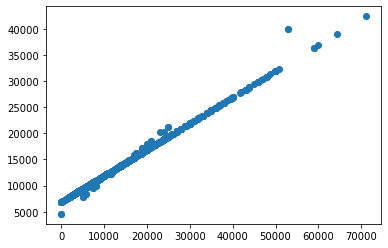

In [116]:
plt.plot(y,y_pred,'o')

In [117]:
y_pred_std

array([387.36335575, 387.36335575, 387.36335575, 387.36335575,
       387.36335575, 387.36335575, 387.36335575, 387.36335575,
       387.36335575, 387.36335575, 387.36335575, 387.36335575,
       387.36335575, 387.36335575, 387.36335575, 387.36335575,
       387.36335575, 387.36335575, 387.36335575, 387.36335575,
       387.36335575, 387.36335575, 387.36335575, 387.36335575,
       387.36335575, 387.36335575, 387.36335575, 387.36335575,
       387.36335575, 387.36335575, 387.36335575, 387.36335575,
       365.17902421, 387.36335575, 387.36335575, 387.36335575,
       387.36335575, 387.36335575, 387.36335575, 387.36335575,
       387.36335575, 387.36335575, 387.36335575, 387.36335575,
       387.36335575, 387.36335575, 387.36335575, 387.36335575,
       387.36335575, 387.36335575, 387.36335575, 387.36335575,
       365.17902421, 387.36335575, 387.36335575, 387.36335575,
       387.36335575, 365.17902421, 387.36335575, 387.36335575,
       387.36335575, 387.36335575, 387.36335575, 387.36

In [118]:
# Model przeuczony

In [119]:
# Podejscie nr 3 - ograniczamy ilość zmiennych

In [120]:
corr_S_tri[abs(corr_S_tri)>0.3]

automatic     manual        -0.882524
diesel        gas           -0.869682
excellent     good          -0.760071
full-size     mid-size      -0.740732
4wd           fwd           -0.664728
4 cylinders   6 cylinders   -0.514308
price         age           -0.476833
4 cylinders   8 cylinders   -0.466244
6 cylinders   8 cylinders   -0.462765
8 cylinders   fwd           -0.458309
lat           fl            -0.449446
long          ca            -0.448373
automatic     other         -0.446555
full-size     4 cylinders   -0.443970
4wd           rwd           -0.441773
compact       full-size     -0.412179
gas           hybrid        -0.406831
price         odometer      -0.387340
excellent     like new      -0.378343
fwd           rwd           -0.376571
4wd           sedan         -0.370947
SUV           sedan         -0.369872
price         fwd           -0.355504
fwd           truck         -0.353804
full-size     fwd           -0.332025
4 cylinders   truck         -0.312906
SUV         

In [121]:
X_ogr = vehicles_no_nan_small[['age','odometer']]
y = vehicles_no_nan_small[['price']]

In [122]:
kernel = ConstantKernel(1.0) + ConstantKernel(1.0) * RBF(10)  + WhiteKernel(5)
gpr = GaussianProcessRegressor(kernel=kernel, random_state=1).fit(X_ogr, y)
gpr.score(X_ogr, y)

0.7573900347712993

In [123]:
y_pred, y_pred_std = gpr.predict(X_ogr, return_std=True)

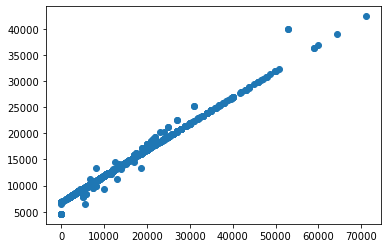

In [124]:
plt.plot(y,y_pred,'o')

In [125]:
# Niestety, ten model też jest przeuczony
# Zmiana funkcji kernel nie pomagała

### Klasyfikacja

In [126]:
# Zmienna age
vehicles_no_nan['age'].value_counts()

7.0     3443
6.0     3381
8.0     3186
3.0     3169
4.0     3135
        ... 
81.0       2
93.0       1
68.0       1
59.0       1
79.0       1
Name: age, Length: 85, dtype: int64

In [127]:
# Klasyfikujemy zbiór vehicles_no_nan na podstawie wieku samochodu, a więc zmiennej 'age'
ile = vehicles_no_nan["age"].value_counts() # to zm. kategoryczna reprezentowana za pomocą liczb całkowitych
# value_counts(), by zobaczyć rozkład
print(ile)
ile.iloc[np.argsort(ile.index)] # sortowanie po indeksie

7.0     3443
6.0     3381
8.0     3186
3.0     3169
4.0     3135
        ... 
81.0       2
93.0       1
68.0       1
59.0       1
79.0       1
Name: age, Length: 85, dtype: int64


0.0      624
1.0     1521
2.0     1870
3.0     3169
4.0     3135
        ... 
88.0       2
90.0       3
91.0       2
92.0       2
93.0       1
Name: age, Length: 85, dtype: int64

In [128]:
# Robimy klasyfikację binarną, gdyż jest prostsza niż wieloklasyfikacyjna, więc musimy age przekształcić na 2 klasy
# Weźmy zatem dwie klasy age < 10 (młode auta) i age >= 10 (stare auta)
vehicles_no_nan["lata"] = pd.cut(vehicles_no_nan["age"], [0, 10, 93], right=False, labels=["młode", "stare"])
# Cut dzieli zbiór na zakresy, a więc pozwala dzielić na klasy
# Natomiast labels nadaje etykiety klasom
vehicles_no_nan["lata"].value_counts()

młode    26182
stare    16086
Name: lata, dtype: int64

In [129]:
vehicles_no_nan # jest dodatkowa zmienna lata (w której ukryte są wartości z 'age'), i to nasza zm. celu

price  odometer        lat        long   age  compact  full-size  \
19      47000.0   10500.0  32.611442  -85.481615   0.0        0          1   
91      24999.0   18823.0  34.206619  -84.777696   4.0        0          1   
92      41900.0   13036.0  34.466560  -85.358940   4.0        0          1   
93      23900.0  145970.0  34.466560  -85.358940  15.0        0          1   
95      18900.0  177450.0  34.466560  -85.358940   8.0        0          1   
...         ...       ...        ...         ...   ...      ...        ...   
458154      0.0   70885.0  42.857878  -88.309457   5.0        0          1   
458195  20488.0   63812.0  44.078180  -87.696800  10.0        0          0   
458202   4995.0  137962.0  44.631225  -90.022076  15.0        1          0   
458204   4495.0  121488.0  44.631225  -90.022076  14.0        0          0   
458211   1300.0  164000.0  44.773500 -106.939600  12.0        0          0   

        mid-size  sub-compact  acura  ...  tn  tx  ut  va  vt  wa  wi  wv  wy  \
19             0            0      0  ...   0   0   0   0   0   0   0   0   0   
91             0            0      0  ...   0   0   0   0   0   0   0   0   0   
92             0            0      0  ...   0   0   0   0   0   0   0   0   0   
93             0            0      0  ...   0   0   0   0   0   0   0   0   0   
95             0            0      0  ...   0   0   0   0   0   0   0   0   0   
...          ...          ...    ...  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..   
458154         0            0      0  ...   0   0   0   0   0   0   1   0   0   
458195         1            0      0  ...   0   0   0   0   0   0   1   0   0   
458202         0            0      0  ...   0   0   0   0   0   0   1   0   0   
458204         1            0      0  ...   0   0   0   0   0   0   1   0   0   
458211         1            0      0  ...   0   0   0   0   0   0   0   0   1   

         lata  
19      młode  
91      młode  
92      młode  
93      stare  
95      młode  
...       ...  
458154  młode  
458195  stare  
458202  stare  
458204  stare  
458211  stare  

[42269 rows x 152 columns]

In [130]:
vehicles_no_nan[vehicles_no_nan.lata == 'młode'].describe()

price      odometer           lat          long           age  \
count   26182.000000  2.618200e+04  26182.000000  26182.000000  26182.000000   
mean    17329.512910  8.480988e+04     38.630808    -92.426589      5.255366   
std     12969.150695  5.070880e+04      5.768240     17.190873      2.482040   
min         0.000000  0.000000e+00     19.699405   -159.365637      0.000000   
25%      8990.000000  4.688300e+04     34.771505    -98.615578      3.000000   
50%     14900.000000  8.265900e+04     39.336100    -87.667996      5.000000   
75%     23598.000000  1.150000e+05     42.705279    -79.989139      7.000000   
max    235000.000000  1.340000e+06     61.559665    -70.024100      9.000000   

            compact     full-size      mid-size   sub-compact         acura  \
count  26182.000000  26182.000000  26182.000000  26182.000000  26182.000000   
mean       0.121992      0.549576      0.311397      0.017035      0.005882   
std        0.327283      0.497546      0.463074      0.129403      0.076469   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      1.000000      0.000000      0.000000      0.000000   
75%        0.000000      1.000000      1.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       ...            sd            tn            tx            ut  \
count  ...  26182.000000  26182.000000  26182.000000  26182.000000   
mean   ...      0.005729      0.023222      0.042319      0.004049   
std    ...      0.075475      0.150611      0.201320      0.063501   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...      1.000000      1.000000      1.000000      1.000000   

                 va            vt            wa            wi            wv  \
count  26182.000000  26182.000000  26182.000000  26182.000000  26182.000000   
mean       0.021580      0.032045      0.006455      0.034489      0.001795   
std        0.145309      0.176123      0.080084      0.182486      0.042332   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                 wy  
count  26182.000000  
mean       0.007066  
std        0.083763  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 151 columns]

In [131]:
vehicles_no_nan[vehicles_no_nan.lata == 'stare'].describe()

price      odometer           lat          long           age  \
count   16086.000000  1.608600e+04  16086.000000  16086.000000  16086.000000   
mean     8549.110469  1.392023e+05     38.589851    -91.931086     15.019209   
std      7401.529769  8.130716e+04      5.318400     17.255570      7.132761   
min         0.000000  0.000000e+00     19.984610   -159.365637     10.000000   
25%      4000.000000  1.010792e+05     35.119200    -98.951100     12.000000   
50%      6500.000000  1.339930e+05     39.130100    -85.825930     13.000000   
75%     10800.000000  1.706120e+05     42.095308    -78.846869     16.000000   
max    205000.000000  1.939810e+06     64.823942    -70.058699     92.000000   

            compact     full-size      mid-size   sub-compact         acura  \
count  16086.000000  16086.000000  16086.000000  16086.000000  16086.000000   
mean       0.115815      0.565336      0.294666      0.024183      0.011252   
std        0.320013      0.495728      0.455907      0.153620      0.105480   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      1.000000      0.000000      0.000000      0.000000   
75%        0.000000      1.000000      1.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       ...            sd            tn            tx            ut  \
count  ...  16086.000000  16086.000000  16086.000000  16086.000000   
mean   ...      0.004352      0.017779      0.036989      0.005533   
std    ...      0.065825      0.132153      0.188740      0.074179   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...      1.000000      1.000000      1.000000      1.000000   

                 va            vt            wa            wi            wv  \
count  16086.000000  16086.000000  16086.000000  16086.000000  16086.000000   
mean       0.047370      0.010320      0.013055      0.027602      0.003170   
std        0.212436      0.101063      0.113513      0.163834      0.056219   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                 wy  
count  16086.000000  
mean       0.002611  
std        0.051032  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 151 columns]

### Model wielomianowy

In [132]:
import sklearn.preprocessing
wielomian2_cechy = sklearn.preprocessing.PolynomialFeatures(degree=2, include_bias=False)
wielomian2_cechy.fit_transform(np.array([[2,3,5],[1,2,3]]))

array([[ 2.,  3.,  5.,  4.,  6., 10.,  9., 15., 25.],
       [ 1.,  2.,  3.,  1.,  2.,  3.,  4.,  6.,  9.]])

In [133]:
wielomian2_cechy.powers_.T

array([[1, 0, 0, 2, 1, 1, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 2, 1, 0],
       [0, 0, 1, 0, 0, 1, 0, 1, 2]], dtype=int64)

In [134]:
# Spróbujmy dla naszego zbioru wygenerować tę cechę:
# Budujemy model wielomianowy przekształcając zbiór treningowy predyktorów X_ucz
# oraz zbiór testowy predyktorów X_test
wielomian2 = sklearn.preprocessing.PolynomialFeatures(degree=2, include_bias=False)
X2_ucz70 = wielomian2.fit_transform(X_ucz70)
X2_test70 = wielomian2.fit_transform(X_test70)

In [135]:
model_names = ["Reg. liniowa 70 polyf"] 
res = [fit_regression(sklearn.linear_model.LinearRegression(), 
                      X2_ucz70, 
                      X2_test70, 
                      y_ucz70, 
                      y_test70)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index=model_names))

In [136]:
df_results_errors

r_score_u  r_score_t         MSE_u         MSE_t  \
Reg. liniowa            0.489488   0.460873  7.169577e+07  8.315830e+07   
Reg. liniowa 70         0.490284   0.466266  7.236334e+07  7.796793e+07   
Reg. liniowa 65         0.488545   0.472568  7.237035e+07  7.719569e+07   
Reg. liniowa 75         0.490556   0.462084  7.188204e+07  8.042283e+07   
Reg. liniowa 85         0.487171   0.461919  7.329389e+07  7.790887e+07   
Reg. liniowa 70 polyf   0.795427   0.337453  2.904275e+07  9.678497e+07   

                             MAE_u        MAE_t      MEDAE_u      MEDAE_t  
Reg. liniowa           5443.684641  5576.709962  3579.078677  3669.913298  
Reg. liniowa 70        5462.683515  5505.866181  3596.185772  3607.461873  
Reg. liniowa 65        5464.513893  5506.333081  3603.171243  3627.817331  
Reg. liniowa 75        5441.713990  5563.775209  3564.373613  3676.652912  
Reg. liniowa 85        5462.333124  5549.841896  3587.508951  3682.727916  
Reg. liniowa 70 polyf  3310.161839  4916.219922  2140.528231  2786.305158

In [137]:
# Uzyskaliśmy zdecydowanie mniejsze błędy dopasowania i predykcji ale nadal są duże
# W przypadku zbioru uczącego wzrosła znaczaco wartosc R2, natoamiast zmaalała dla testowego